In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Specify the path to your Excel file
file_path = 'innercity.xlsx'

In [3]:
df = pd.read_excel(file_path)

In [4]:
# Set the maximum number of columns to display
pd.set_option('display.max_columns', None)

In [5]:
df.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3.876101e+09,20150427T000000,600000.0,4.0,1.75,3050.0,9440.0,1.0,0.0,0.0,3.0,8.0,1800.0,1250.0,1966.0,0.0,98034.0,47.7228,-122.183,2020.0,8660.0,0.0,12490.0
1,3.145600e+09,20150317T000000,190000.0,2.0,1.00,670.0,3101.0,1.0,0.0,0.0,4.0,6.0,670.0,0.0,1948.0,0.0,98118.0,47.5546,-122.274,1660.0,4100.0,0.0,3771.0
2,7.129303e+09,20140820T000000,735000.0,4.0,2.75,3040.0,2415.0,2.0,1.0,4.0,3.0,8.0,3040.0,0.0,1966.0,0.0,98118.0,47.5188,-122.256,2620.0,2433.0,0.0,5455.0
3,7.338220e+09,20141010T000000,257000.0,3.0,2.50,1740.0,3721.0,2.0,0.0,0.0,3.0,8.0,1740.0,0.0,2009.0,0.0,98002.0,47.3363,-122.213,2030.0,3794.0,0.0,5461.0
4,7.950301e+09,20150218T000000,450000.0,2.0,1.00,1120.0,4590.0,1.0,0.0,0.0,3.0,7.0,1120.0,0.0,1924.0,0.0,98118.0,47.5663,-122.285,1120.0,5100.0,0.0,5710.0


In [6]:
df.tail()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
21608,2.036006e+08,20150310T000000,685530.0,4.0,2.50,3130.0,60467.0,2.0,0.0,0.0,3.0,9.0,3130.0,0.0,1996.0,0.0,98014.0,47.6618,-121.962,2780.0,44224.0,1.0,63597.0
21609,6.250493e+08,20140521T000000,535000.0,2.0,1.00,1030.0,4841.0,1.0,0.0,0.0,3.0,7.0,920.0,110.0,1939.0,0.0,98103.0,47.6860,-122.341,1530.0,4944.0,0.0,5871.0
21610,4.240690e+08,20140905T000000,998000.0,3.0,3.75,3710.0,34412.0,2.0,0.0,0.0,3.0,10.0,2910.0,800.0,1978.0,0.0,98075.0,47.5888,-122.04,2390.0,34412.0,1.0,38122.0
21611,7.258200e+09,20150206T000000,262000.0,4.0,2.50,1560.0,7800.0,2.0,0.0,0.0,3.0,7.0,1560.0,0.0,1997.0,0.0,98168.0,47.5140,-122.316,1160.0,7800.0,0.0,9360.0
21612,8.805900e+09,20141229T000000,1150000.0,4.0,2.50,1940.0,4875.0,2.0,0.0,0.0,4.0,9.0,1940.0,0.0,1925.0,0.0,98112.0,47.6427,-122.304,1790.0,4875.0,1.0,6815.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  float64
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  float64
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21571 non-null  object 
 8   coast             21612 non-null  object 
 9   sight             21556 non-null  float64
 10  condition         21556 non-null  object 
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21612 non-null  object 
 15  yr_renovated      21613 non-null  float64
 16  zipcode           21613 non-null  float6

In [8]:
# Display the first few rows of the dataset to get an idea of the 'dayhours' column
print(df['dayhours'].head())


0    20150427T000000
1    20150317T000000
2    20140820T000000
3    20141010T000000
4    20150218T000000
Name: dayhours, dtype: object


In [9]:
# Extract date and time components
df['date'] = pd.to_datetime(df['dayhours'], format='%Y%m%dT%H%M%S')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute
df['second'] = df['date'].dt.second

# Check the extracted date and time components
print(df[['year', 'month', 'day', 'hour', 'minute', 'second']].head())


   year  month  day  hour  minute  second
0  2015      4   27     0       0       0
1  2015      3   17     0       0       0
2  2014      8   20     0       0       0
3  2014     10   10     0       0       0
4  2015      2   18     0       0       0


In [10]:
# Find the minimum and maximum dates in the dataset
min_date = df['date'].min()
max_date = df['date'].max()

# Calculate the total number of data points
total_data_points = len(df)

# Calculate the frequency of data points per year and per month
data_points_per_year = df['year'].value_counts().sort_index()
data_points_per_month = df['month'].value_counts().sort_index()

print(f"Time Range: {min_date} to {max_date}")
print(f"Total Data Points: {total_data_points}")
print("Data Points per Year:")
print(data_points_per_year)
print("Data Points per Month:")
print(data_points_per_month)


Time Range: 2014-05-02 00:00:00 to 2015-05-27 00:00:00
Total Data Points: 21613
Data Points per Year:
2014    14633
2015     6980
Name: year, dtype: int64
Data Points per Month:
1      978
2     1250
3     1875
4     2231
5     2414
6     2180
7     2211
8     1940
9     1774
10    1878
11    1411
12    1471
Name: month, dtype: int64


In [11]:
# Calculate data points per year and per month for each year
data_points_per_year_month = df.groupby(['year', 'month']).size().unstack(fill_value=0)

print("Data Points per Year and Month:")
print(data_points_per_year_month)


Data Points per Year and Month:
month   1     2     3     4     5     6     7     8     9     10    11    12
year                                                                        
2014     0     0     0     0  1768  2180  2211  1940  1774  1878  1411  1471
2015   978  1250  1875  2231   646     0     0     0     0     0     0     0


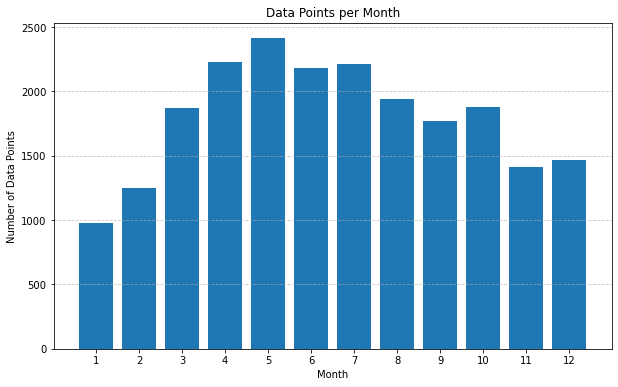

In [12]:
# Data points per month
data_points_per_month = df['month'].value_counts().sort_index()

# Create a histogram plot
plt.figure(figsize=(10, 6))
plt.bar(data_points_per_month.index, data_points_per_month.values, tick_label=data_points_per_month.index)
plt.xlabel('Month')
plt.ylabel('Number of Data Points')
plt.title('Data Points per Month')
plt.xticks(data_points_per_month.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [13]:
# Calculate the time difference between consecutive data points
time_diff = df['date'].diff()

# Display basic statistics of time differences
print(time_diff.describe())

count                          21612
mean     -1 days +23:52:04.264297613
std      160 days 13:47:21.921352850
min              -374 days +00:00:00
25%              -115 days +00:00:00
50%                  0 days 00:00:00
75%                114 days 00:00:00
max                372 days 00:00:00
Name: date, dtype: object


In [14]:
# Display the first few rows of the dataset
print("First Few Rows of the Dataset:")
print(df.head())

First Few Rows of the Dataset:
            cid         dayhours     price  room_bed  room_bath  \
0  3.876101e+09  20150427T000000  600000.0       4.0       1.75   
1  3.145600e+09  20150317T000000  190000.0       2.0       1.00   
2  7.129303e+09  20140820T000000  735000.0       4.0       2.75   
3  7.338220e+09  20141010T000000  257000.0       3.0       2.50   
4  7.950301e+09  20150218T000000  450000.0       2.0       1.00   

   living_measure  lot_measure ceil coast  sight condition  quality  \
0          3050.0       9440.0  1.0   0.0    0.0       3.0      8.0   
1           670.0       3101.0  1.0   0.0    0.0       4.0      6.0   
2          3040.0       2415.0  2.0   1.0    4.0       3.0      8.0   
3          1740.0       3721.0  2.0   0.0    0.0       3.0      8.0   
4          1120.0       4590.0  1.0   0.0    0.0       3.0      7.0   

   ceil_measure  basement yr_built  yr_renovated  zipcode      lat     long  \
0        1800.0    1250.0   1966.0           0.0  98034.0  4

In [15]:
# Check column names
print("\nColumn Names:")
print(df.columns)



Column Names:
Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area', 'date', 'year', 'month', 'day', 'hour', 'minute',
       'second'],
      dtype='object')


In [16]:
# Display descriptive details of numerical columns
print("\nDescriptive Details of Numerical Columns:")
print(df.describe())


Descriptive Details of Numerical Columns:
                cid         price      room_bed     room_bath  living_measure  \
count  2.161300e+04  2.161300e+04  21505.000000  21505.000000    21596.000000   
mean   4.580302e+09  5.401822e+05      3.371355      2.115171     2079.860761   
std    2.876566e+09  3.673622e+05      0.930289      0.770248      918.496121   
min    1.000102e+06  7.500000e+04      0.000000      0.000000      290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000     1429.250000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000     1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000     2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000    13540.000000   

        lot_measure         sight       quality  ceil_measure      basement  \
count  2.157100e+04  21556.000000  21612.000000  21612.000000  21612.000000   
mean   1.510458e+04      0.234366      7.656857   1788.366556    291.

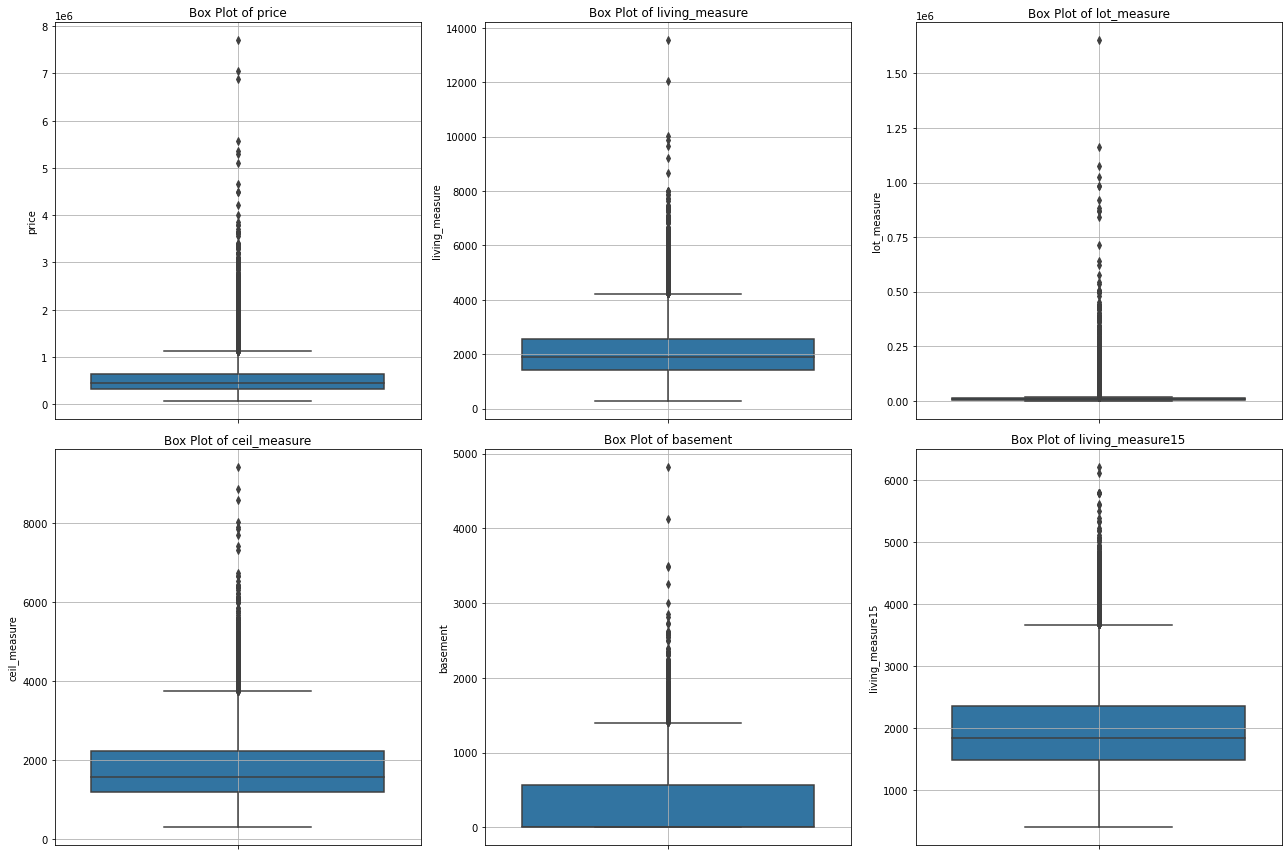

In [17]:


# Select numerical attributes
numerical_attributes = ['price', 'living_measure', 'lot_measure', 'ceil_measure', 'basement','living_measure15','lot_measure15','total_area']

# Define the number of rows and columns in the subplot grid
num_rows = 2
num_cols = 3

# Create subplots for a subset of numerical attributes
plt.figure(figsize=(18, 12))
for i, column in enumerate(numerical_attributes[:num_rows * num_cols], 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(data=df, y=column)
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)
    plt.grid(True)

plt.tight_layout()
plt.show()



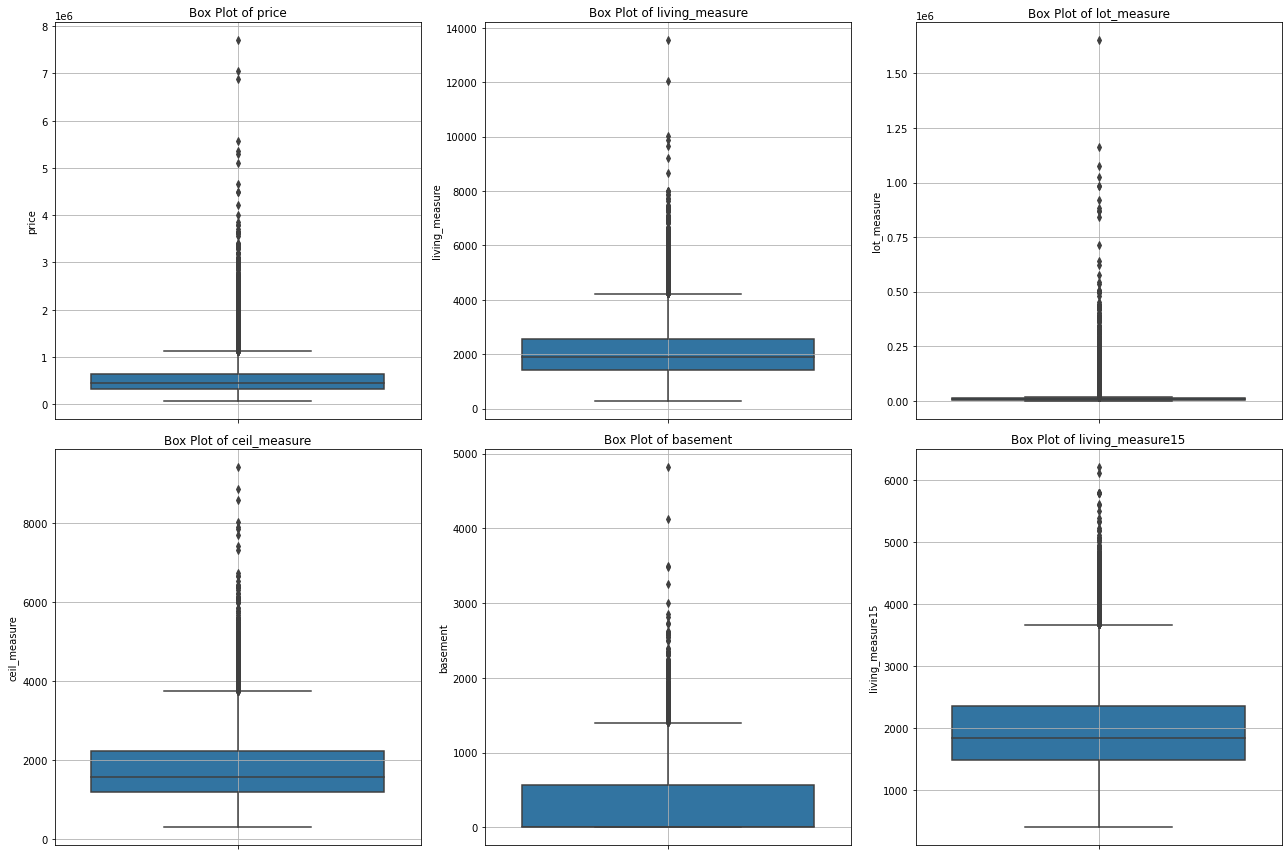

In [18]:


# Select numerical attributes
numerical_attributes = ['price', 'living_measure', 'lot_measure', 'ceil_measure', 'basement','living_measure15','lot_measure15','total_area']

# Define the number of rows and columns in the subplot grid
num_rows = 2
num_cols = 3

# Create subplots for a subset of numerical attributes
plt.figure(figsize=(18, 12))
for i, column in enumerate(numerical_attributes[:num_rows * num_cols], 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(data=df, y=column)
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)
    plt.grid(True)

plt.tight_layout()
plt.show()


In [19]:
# Function to identify outliers using IQR method
def identify_outliers(data, attribute):
    Q1 = data[attribute].quantile(0.25)
    Q3 = data[attribute].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[attribute] < lower_bound) | (data[attribute] > upper_bound)]
    return outliers

# Identify outliers for each numerical attribute
for attribute in numerical_attributes:
    outliers = identify_outliers(df, attribute)
    print(f'Outliers in {attribute}:')
    print(outliers)



Outliers in price:
                cid         dayhours      price  room_bed  room_bath  \
7      1.624059e+09  20140618T000000  1160000.0       4.0       3.50   
88     3.627800e+09  20140715T000000  1380000.0       5.0       4.00   
100    1.370801e+09  20150325T000000  1400000.0       4.0       2.50   
134    4.141000e+09  20141205T000000  1230000.0       4.0       2.50   
145    1.802000e+09  20140612T000000  1330000.0       5.0       2.25   
...             ...              ...        ...       ...        ...   
21547  3.885805e+09  20141001T000000  1490000.0       4.0       3.25   
21559  2.579500e+09  20150421T000000  1390000.0       4.0       3.50   
21570  6.752500e+09  20150127T000000  1840000.0       4.0       3.50   
21577  4.131900e+09  20140825T000000  3100000.0       3.0       3.00   
21612  8.805900e+09  20141229T000000  1150000.0       4.0       2.50   

       living_measure  lot_measure ceil coast  sight condition  quality  \
7              4680.0       9700.0  2.0  

TypeError: '<' not supported between instances of 'str' and 'float'

In [20]:
# Function to identify outliers using IQR method
def identify_outliers(data, attribute):
    Q1 = data[attribute].quantile(0.25)
    Q3 = data[attribute].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[attribute] < lower_bound) | (data[attribute] > upper_bound)]
    return outliers

# Identify outliers for each numerical attribute
for attribute in numerical_attributes:
    outliers = identify_outliers(df, attribute)
    print(f'Outliers in {attribute}:')
    print(outliers)
    print('-' * 40)  # Separator line between attributes


Outliers in price:
                cid         dayhours      price  room_bed  room_bath  \
7      1.624059e+09  20140618T000000  1160000.0       4.0       3.50   
88     3.627800e+09  20140715T000000  1380000.0       5.0       4.00   
100    1.370801e+09  20150325T000000  1400000.0       4.0       2.50   
134    4.141000e+09  20141205T000000  1230000.0       4.0       2.50   
145    1.802000e+09  20140612T000000  1330000.0       5.0       2.25   
...             ...              ...        ...       ...        ...   
21547  3.885805e+09  20141001T000000  1490000.0       4.0       3.25   
21559  2.579500e+09  20150421T000000  1390000.0       4.0       3.50   
21570  6.752500e+09  20150127T000000  1840000.0       4.0       3.50   
21577  4.131900e+09  20140825T000000  3100000.0       3.0       3.00   
21612  8.805900e+09  20141229T000000  1150000.0       4.0       2.50   

       living_measure  lot_measure ceil coast  sight condition  quality  \
7              4680.0       9700.0  2.0  

TypeError: '<' not supported between instances of 'str' and 'float'

In [21]:
# Iterate through columns and print unique values
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique Values in '{column}' Column:")
    print(unique_values)
    print("\n")


Unique Values in 'cid' Column:
[3.87610094e+09 3.14560025e+09 7.12930307e+09 ... 4.24069018e+08
 7.25820006e+09 8.80590043e+09]


Unique Values in 'dayhours' Column:
['20150427T000000' '20150317T000000' '20140820T000000' '20141010T000000'
 '20150218T000000' '20140709T000000' '20140715T000000' '20140618T000000'
 '20140721T000000' '20141028T000000' '20140502T000000' '20150123T000000'
 '20141029T000000' '20150311T000000' '20140822T000000' '20140522T000000'
 '20140819T000000' '20150428T000000' '20150212T000000' '20140909T000000'
 '20141125T000000' '20140818T000000' '20140719T000000' '20141230T000000'
 '20150112T000000' '20140829T000000' '20150501T000000' '20140811T000000'
 '20141103T000000' '20140620T000000' '20141203T000000' '20141030T000000'
 '20141208T000000' '20140903T000000' '20140610T000000' '20150422T000000'
 '20140625T000000' '20150222T000000' '20150113T000000' '20140923T000000'
 '20140624T000000' '20150128T000000' '20141014T000000' '20150316T000000'
 '20140912T000000' '20140606T00

In [22]:
# Initialize a dictionary to store anomaly counts for each column
anomaly_counts = {}

# Iterate through columns and print unique values
for column in df.columns:
    unique_values = df[column].unique()
    # Initialize the anomaly count for the current column
    anomaly_count = 0
    
    # Check for anomalies (non-numeric values or symbols)
    for value in unique_values:
        if not isinstance(value, (int, float)):  # Check if the value is not numeric
            anomaly_count += 1
    
    # Store the anomaly count in the dictionary
    anomaly_counts[column] = anomaly_count
    
    # Print unique values and anomaly count for the current column
    print(f"Unique Values in '{column}' Column:")
    print(unique_values)
    print(f"Anomaly Count in '{column}' Column: {anomaly_count}\n")

# Display the dictionary containing anomaly counts for each column
print("Anomaly Counts for Each Column:")
print(anomaly_counts)


Unique Values in 'cid' Column:
[3.87610094e+09 3.14560025e+09 7.12930307e+09 ... 4.24069018e+08
 7.25820006e+09 8.80590043e+09]
Anomaly Count in 'cid' Column: 0

Unique Values in 'dayhours' Column:
['20150427T000000' '20150317T000000' '20140820T000000' '20141010T000000'
 '20150218T000000' '20140709T000000' '20140715T000000' '20140618T000000'
 '20140721T000000' '20141028T000000' '20140502T000000' '20150123T000000'
 '20141029T000000' '20150311T000000' '20140822T000000' '20140522T000000'
 '20140819T000000' '20150428T000000' '20150212T000000' '20140909T000000'
 '20141125T000000' '20140818T000000' '20140719T000000' '20141230T000000'
 '20150112T000000' '20140829T000000' '20150501T000000' '20140811T000000'
 '20141103T000000' '20140620T000000' '20141203T000000' '20141030T000000'
 '20141208T000000' '20140903T000000' '20140610T000000' '20150422T000000'
 '20140625T000000' '20150222T000000' '20150113T000000' '20140923T000000'
 '20140624T000000' '20150128T000000' '20141014T000000' '20150316T000000'

In [23]:
# Create a copy of the original dataset and name it df_copy_1
df_copy_1 = df.copy()

In [24]:
# Convert selected columns to object data type
columns_to_convert = ['ceil', 'coast', 'sight', 'condition', 'quality', 'furnished', 'room_bed', 'room_bath']
df_copy_1[columns_to_convert] = df_copy_1[columns_to_convert].astype(str)

In [26]:
# Verify the data types of the selected columns in df_copy_1
print("Data Types of Selected Columns in df_copy_1:")
print(df_copy_1[columns_to_convert].dtypes)

Data Types of Selected Columns in df_copy_1:
ceil         object
coast        object
sight        object
condition    object
quality      object
furnished    object
room_bed     object
room_bath    object
dtype: object


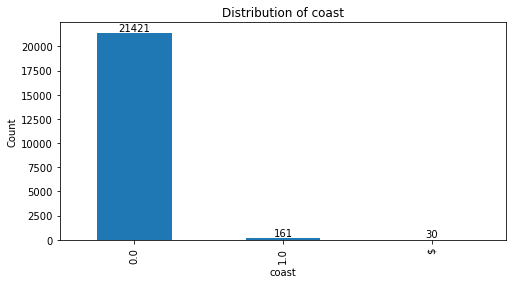

Column: coast
Unique Values Count: 3
Counts of Repetitive Unique Values:
0.0    21421
1.0      161
$         30
Name: coast, dtype: int64




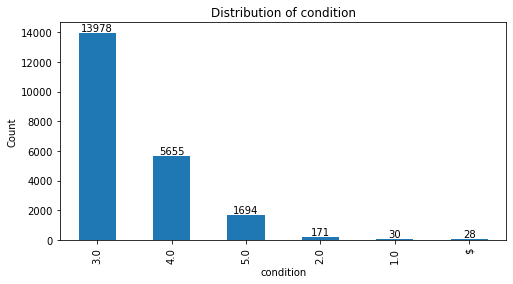

Column: condition
Unique Values Count: 6
Counts of Repetitive Unique Values:
3.0    13978
4.0     5655
5.0     1694
2.0      171
1.0       30
$         28
Name: condition, dtype: int64




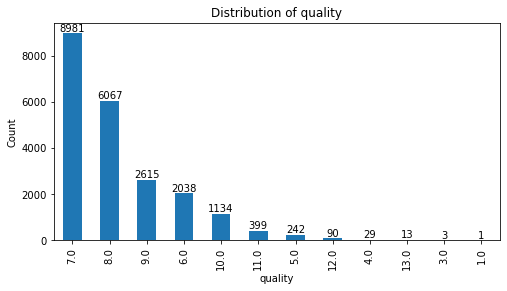

Column: quality
Unique Values Count: 12
Counts of Repetitive Unique Values:
7.0     8981
8.0     6067
9.0     2615
6.0     2038
10.0    1134
11.0     399
5.0      242
12.0      90
4.0       29
13.0      13
3.0        3
1.0        1
Name: quality, dtype: int64




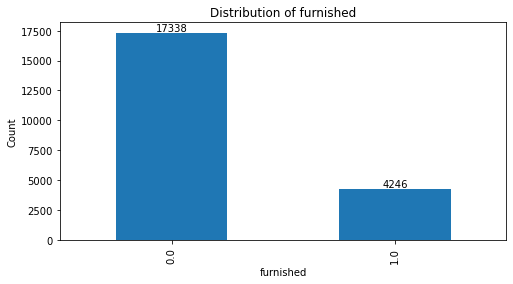

Column: furnished
Unique Values Count: 2
Counts of Repetitive Unique Values:
0.0    17338
1.0     4246
Name: furnished, dtype: int64




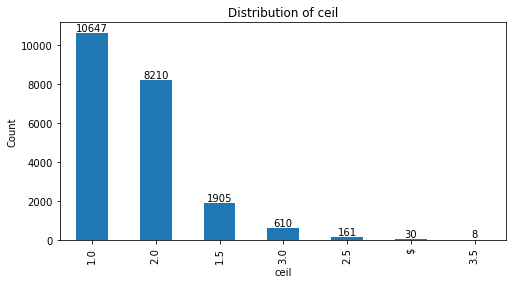

Column: ceil
Unique Values Count: 7
Counts of Repetitive Unique Values:
1.0    10647
2.0     8210
1.5     1905
3.0      610
2.5      161
$         30
3.5        8
Name: ceil, dtype: int64




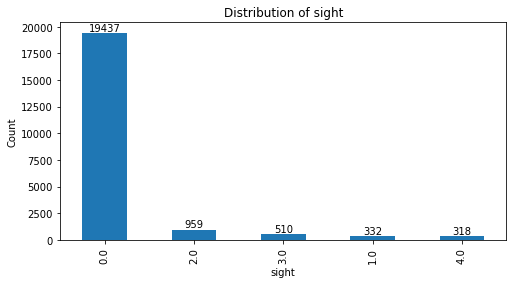

Column: sight
Unique Values Count: 5
Counts of Repetitive Unique Values:
0.0    19437
2.0      959
3.0      510
1.0      332
4.0      318
Name: sight, dtype: int64




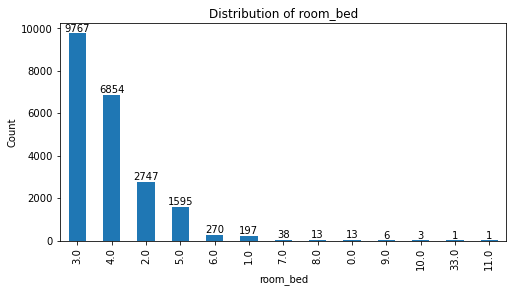

Column: room_bed
Unique Values Count: 13
Counts of Repetitive Unique Values:
3.0     9767
4.0     6854
2.0     2747
5.0     1595
6.0      270
1.0      197
7.0       38
8.0       13
0.0       13
9.0        6
10.0       3
33.0       1
11.0       1
Name: room_bed, dtype: int64




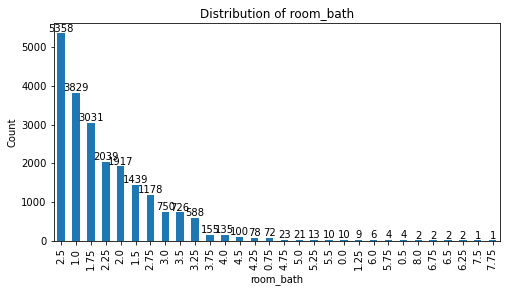

Column: room_bath
Unique Values Count: 30
Counts of Repetitive Unique Values:
2.50    5358
1.00    3829
1.75    3031
2.25    2039
2.00    1917
1.50    1439
2.75    1178
3.00     750
3.50     726
3.25     588
3.75     155
4.00     135
4.50     100
4.25      78
0.75      72
4.75      23
5.00      21
5.25      13
5.50      10
0.00      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.75       2
6.50       2
6.25       2
7.50       1
7.75       1
Name: room_bath, dtype: int64




In [28]:
import matplotlib.pyplot as plt

# Categorical attributes
categorical_attributes = ['coast', 'condition', 'quality', 'furnished', 'ceil', 'sight', 'room_bed', 'room_bath']

# Create bar plots and count unique values and their occurrences
for column in categorical_attributes:
    plt.figure(figsize=(8, 4))
    
    # Create the bar plot
    ax = df[column].value_counts().plot(kind='bar')
    
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Distribution of {column}')
    
    # Add labels with values on top of the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
    
    plt.show()

    # Count unique values
    unique_values_count = df[column].nunique()

    # Count occurrences of each unique value
    unique_value_counts = df[column].value_counts()

    print(f"Column: {column}")
    print(f"Unique Values Count: {unique_values_count}")
    print(f"Counts of Repetitive Unique Values:")
    print(unique_value_counts)
    print("\n")


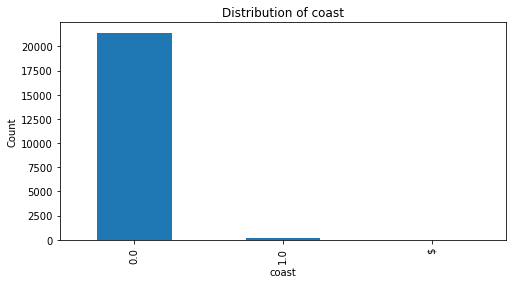

Column: coast
Unique Values Count: 3
Counts of Repetitive Unique Values:
0.0    21421
1.0      161
$         30
Name: coast, dtype: int64




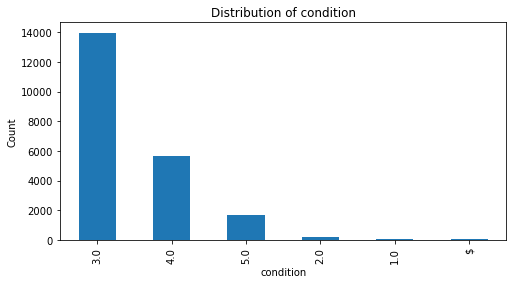

Column: condition
Unique Values Count: 6
Counts of Repetitive Unique Values:
3.0    13978
4.0     5655
5.0     1694
2.0      171
1.0       30
$         28
Name: condition, dtype: int64




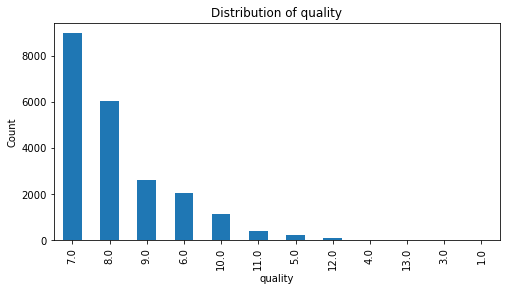

Column: quality
Unique Values Count: 12
Counts of Repetitive Unique Values:
7.0     8981
8.0     6067
9.0     2615
6.0     2038
10.0    1134
11.0     399
5.0      242
12.0      90
4.0       29
13.0      13
3.0        3
1.0        1
Name: quality, dtype: int64




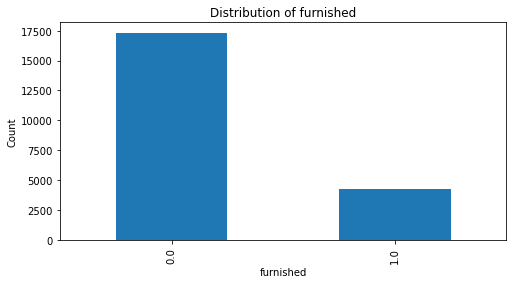

Column: furnished
Unique Values Count: 2
Counts of Repetitive Unique Values:
0.0    17338
1.0     4246
Name: furnished, dtype: int64




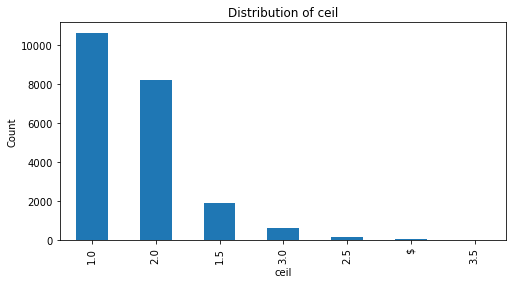

Column: ceil
Unique Values Count: 7
Counts of Repetitive Unique Values:
1.0    10647
2.0     8210
1.5     1905
3.0      610
2.5      161
$         30
3.5        8
Name: ceil, dtype: int64




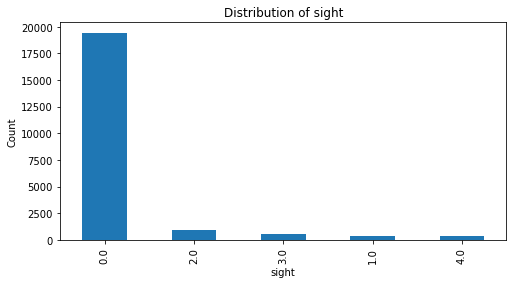

Column: sight
Unique Values Count: 5
Counts of Repetitive Unique Values:
0.0    19437
2.0      959
3.0      510
1.0      332
4.0      318
Name: sight, dtype: int64




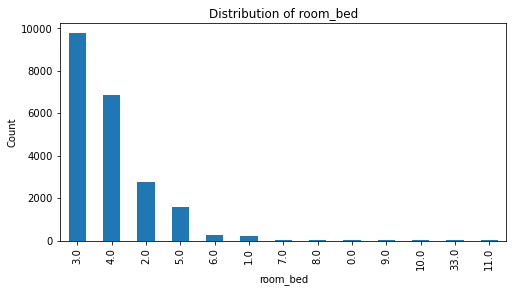

Column: room_bed
Unique Values Count: 13
Counts of Repetitive Unique Values:
3.0     9767
4.0     6854
2.0     2747
5.0     1595
6.0      270
1.0      197
7.0       38
8.0       13
0.0       13
9.0        6
10.0       3
33.0       1
11.0       1
Name: room_bed, dtype: int64




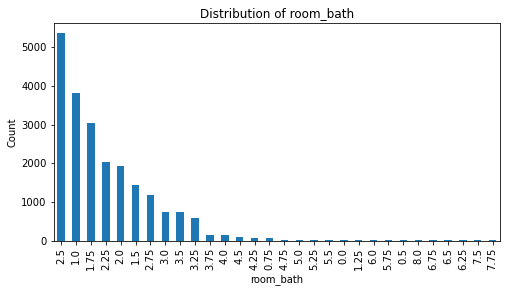

Column: room_bath
Unique Values Count: 30
Counts of Repetitive Unique Values:
2.50    5358
1.00    3829
1.75    3031
2.25    2039
2.00    1917
1.50    1439
2.75    1178
3.00     750
3.50     726
3.25     588
3.75     155
4.00     135
4.50     100
4.25      78
0.75      72
4.75      23
5.00      21
5.25      13
5.50      10
0.00      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.75       2
6.50       2
6.25       2
7.50       1
7.75       1
Name: room_bath, dtype: int64




In [26]:
import matplotlib.pyplot as plt

# Categorical attributes
categorical_attributes = ['coast', 'condition', 'quality', 'furnished', 'ceil', 'sight', 'room_bed', 'room_bath']

# Create bar plots and count unique values and their occurrences
for column in categorical_attributes:
    plt.figure(figsize=(8, 4))
    df[column].value_counts().plot(kind='bar')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Distribution of {column}')
    plt.show()

    # Count unique values
    unique_values_count = df[column].nunique()

    # Count occurrences of each unique value
    unique_value_counts = df[column].value_counts()

    print(f"Column: {column}")
    print(f"Unique Values Count: {unique_values_count}")
    print(f"Counts of Repetitive Unique Values:")
    print(unique_value_counts)
    print("\n")


In [29]:
# Iterate through columns and replace non-numeric anomalies with NaN
for column in df_copy_1.columns:
    df_copy_1[column] = pd.to_numeric(df_copy_1[column], errors='coerce')

# Check the data types after conversion
print(df_copy_1.dtypes)


cid                 float64
dayhours            float64
price               float64
room_bed            float64
room_bath           float64
living_measure      float64
lot_measure         float64
ceil                float64
coast               float64
sight               float64
condition           float64
quality             float64
ceil_measure        float64
basement            float64
yr_built            float64
yr_renovated        float64
zipcode             float64
lat                 float64
long                float64
living_measure15    float64
lot_measure15       float64
furnished           float64
total_area          float64
date                  int64
year                  int64
month                 int64
day                   int64
hour                  int64
minute                int64
second                int64
dtype: object


In [30]:
# List of columns and their original data types
original_data_types = {
    'room_bed': object,
    'room_bath': object,
    'ceil': object,
    'coast': object,
    'sight': object,
    'condition': object,
    'quality': object,
    'furnished': object,
}

# Convert columns to their original data types
for column, dtype in original_data_types.items():
    df_copy_1[column] = df_copy_1[column].astype(dtype)


In [31]:
df_copy_1['total_area'] = df_copy_1['total_area'].astype(float)

In [32]:
df_copy_1['yr_built'] = pd.to_datetime(df_copy_1['yr_built'], format='%Y', errors='coerce')
df_copy_1['yr_renovated'] = pd.to_datetime(df_copy_1['yr_renovated'], format='%Y', errors='coerce')

In [33]:
df_copy_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   cid               21613 non-null  float64       
 1   dayhours          0 non-null      float64       
 2   price             21613 non-null  float64       
 3   room_bed          21505 non-null  object        
 4   room_bath         21505 non-null  object        
 5   living_measure    21596 non-null  float64       
 6   lot_measure       21571 non-null  float64       
 7   ceil              21541 non-null  object        
 8   coast             21582 non-null  object        
 9   sight             21556 non-null  object        
 10  condition         21528 non-null  object        
 11  quality           21612 non-null  object        
 12  ceil_measure      21612 non-null  float64       
 13  basement          21612 non-null  float64       
 14  yr_built          2159

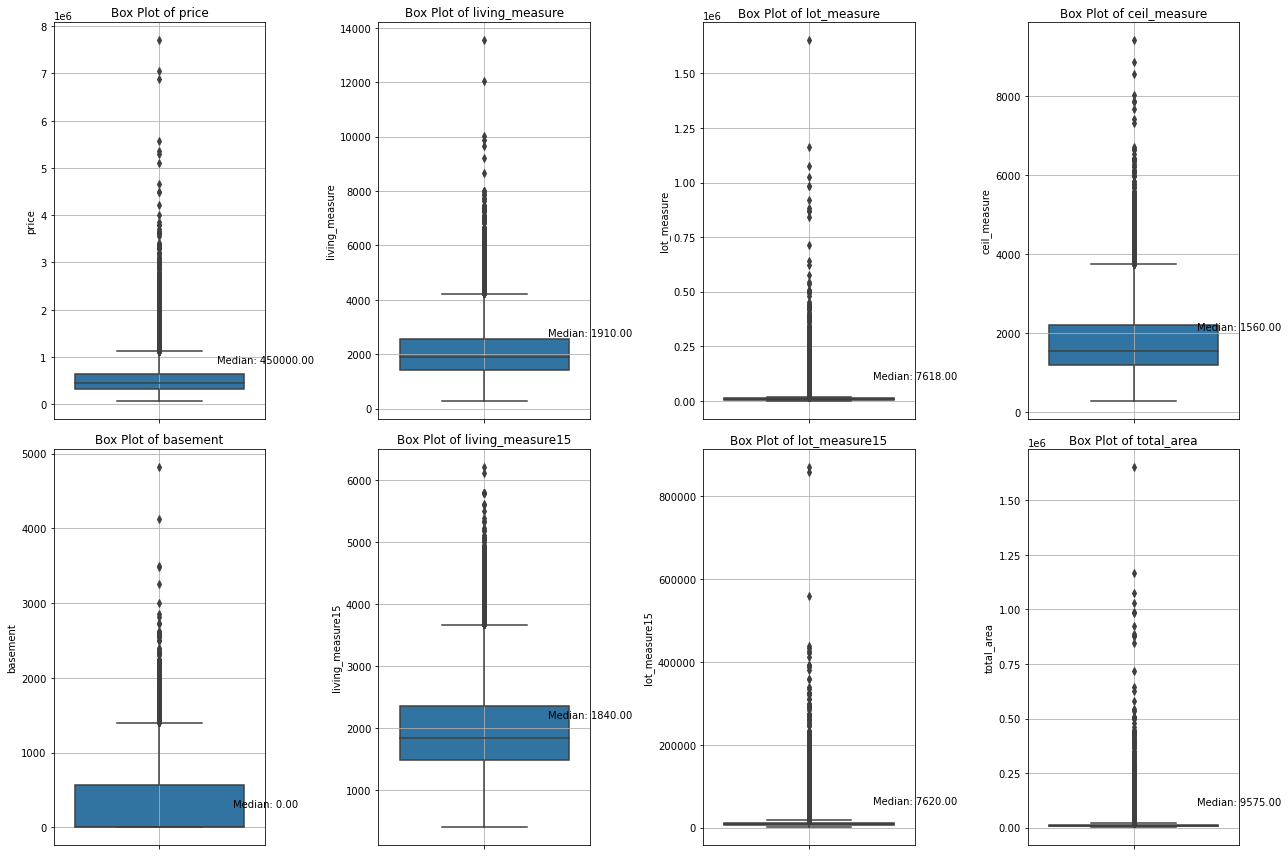

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical attributes
numerical_attributes = ['price', 'living_measure', 'lot_measure', 'ceil_measure', 'basement', 'living_measure15', 'lot_measure15', 'total_area']

# Create subplots for all numerical attributes
plt.figure(figsize=(18, 12))
for i, column in enumerate(numerical_attributes, 1):
    plt.subplot(2, 4, i)  # 2 rows, 4 columns for 8 boxplots
    sns.boxplot(data=df_copy_1, y=column)
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)
    plt.grid(True)
    
    # Label the box plots with the median value
    median = df_copy_1[column].median()
    plt.annotate(f'Median: {median:.2f}', xy=(0.5, median), xytext=(0, 20), textcoords='offset points', ha='center', fontsize=10, color='black')
    
plt.tight_layout()
plt.show()


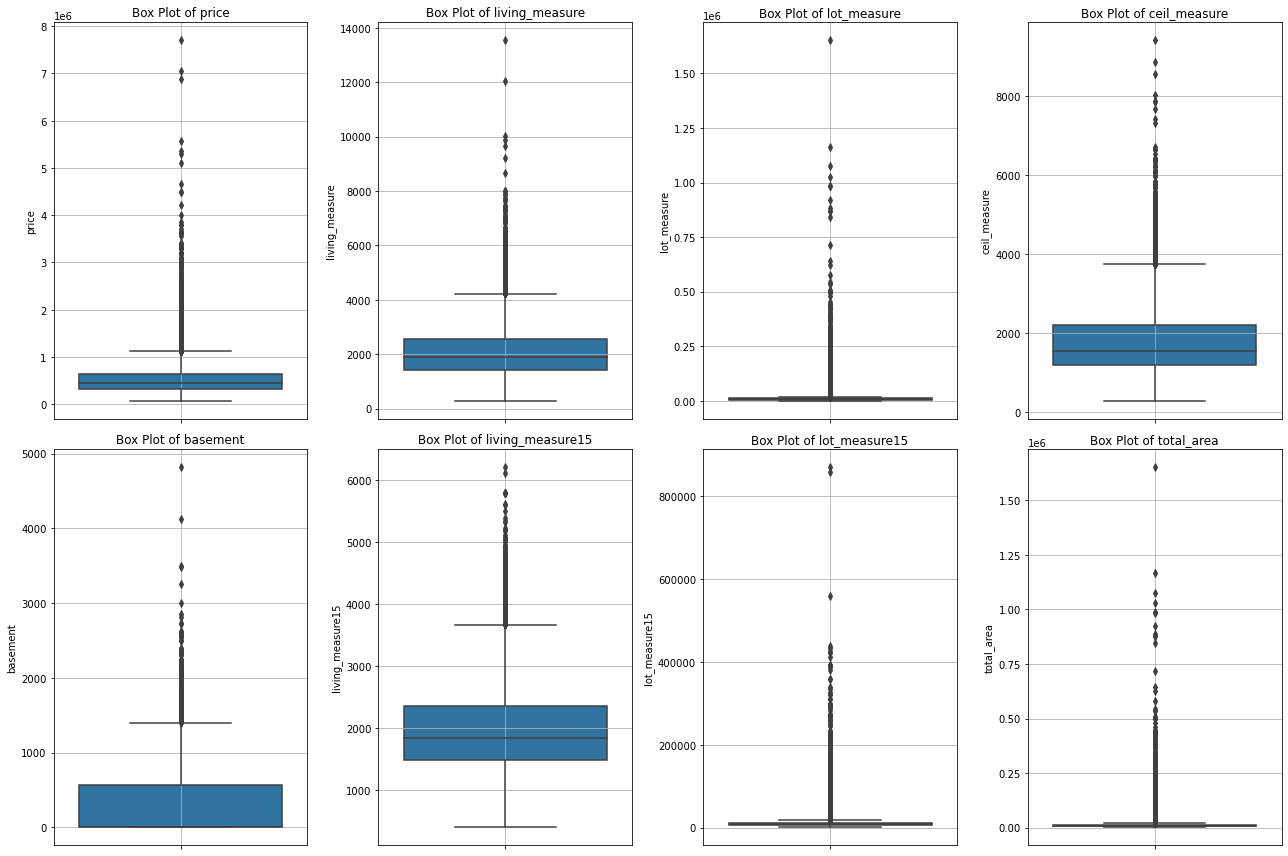

In [33]:

# Select numerical attributes
numerical_attributes = ['price', 'living_measure', 'lot_measure', 'ceil_measure', 'basement', 'living_measure15', 'lot_measure15', 'total_area']

# Create subplots for all numerical attributes
plt.figure(figsize=(18, 12))
for i, column in enumerate(numerical_attributes, 1):
    plt.subplot(2, 4, i)  # 2 rows, 4 columns for 8 boxplots
    sns.boxplot(data=df_copy_1, y=column)
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)
    plt.grid(True)

plt.tight_layout()
plt.show()


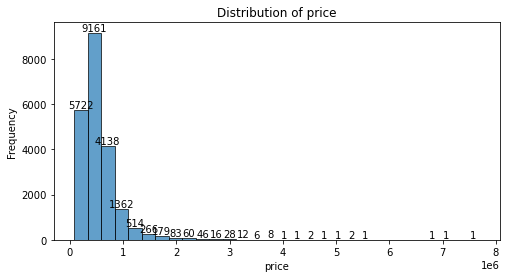

Column: price
Unique Values Count: 3625
Counts of Repetitive Unique Values:
450000.0    172
350000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
919000.0      1
364988.0      1
362764.0      1
849900.0      1
685530.0      1
Name: price, Length: 3625, dtype: int64




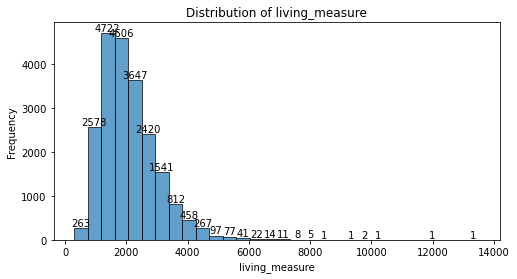

Column: living_measure
Unique Values Count: 1038
Counts of Repetitive Unique Values:
1300.0    138
1400.0    134
1440.0    133
1010.0    129
1800.0    129
         ... 
1728.0      1
5240.0      1
2105.0      1
3845.0      1
2253.0      1
Name: living_measure, Length: 1038, dtype: int64




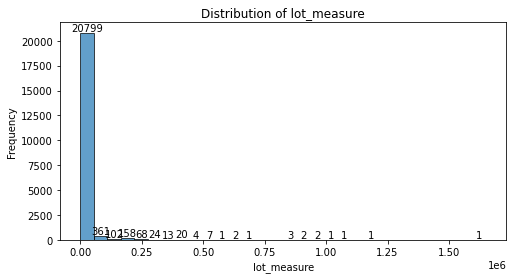

Column: lot_measure
Unique Values Count: 9765
Counts of Repetitive Unique Values:
5000.0      356
6000.0      290
4000.0      251
7200.0      219
4800.0      120
           ... 
641203.0      1
913.0         1
12286.0       1
8749.0        1
60467.0       1
Name: lot_measure, Length: 9765, dtype: int64




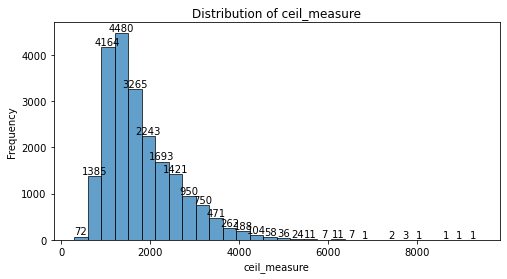

Column: ceil_measure
Unique Values Count: 946
Counts of Repetitive Unique Values:
1300.0    212
1010.0    210
1200.0    206
1220.0    192
1140.0    184
         ... 
2481.0      1
1728.0      1
2105.0      1
3845.0      1
2253.0      1
Name: ceil_measure, Length: 946, dtype: int64




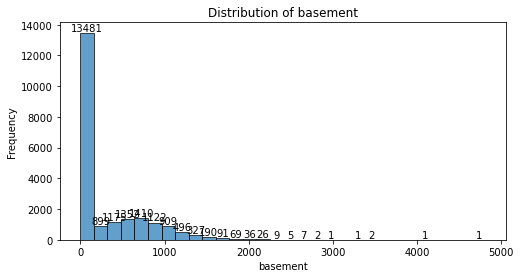

Column: basement
Unique Values Count: 306
Counts of Repetitive Unique Values:
0.0       13125
600.0       221
700.0       218
500.0       214
800.0       206
          ...  
4130.0        1
2050.0        1
784.0         1
518.0         1
2180.0        1
Name: basement, Length: 306, dtype: int64




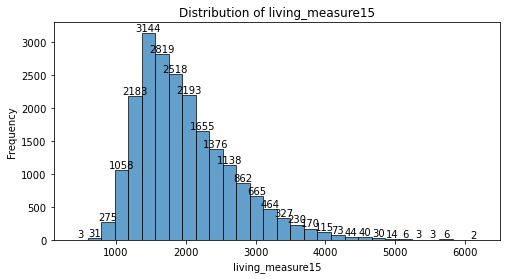

Column: living_measure15
Unique Values Count: 774
Counts of Repetitive Unique Values:
1540.0    197
1440.0    193
1560.0    192
1500.0    178
1580.0    167
         ... 
1813.0      1
1336.0      1
2005.0      1
2049.0      1
1786.0      1
Name: living_measure15, Length: 774, dtype: int64




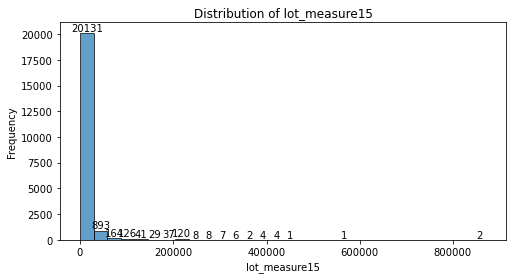

Column: lot_measure15
Unique Values Count: 8682
Counts of Repetitive Unique Values:
5000.0    427
4000.0    357
6000.0    287
7200.0    211
4800.0    145
         ... 
4862.0      1
5228.0      1
9354.0      1
2378.0      1
7604.0      1
Name: lot_measure15, Length: 8682, dtype: int64




TypeError: '<=' not supported between instances of 'float' and 'str'

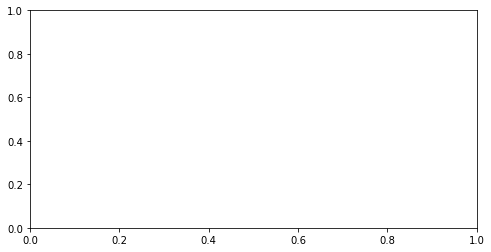

In [43]:
# Numerical attributes
numerical_attributes = ['price', 'living_measure', 'lot_measure', 'ceil_measure', 'basement', 'living_measure15', 'lot_measure15', 'total_area']

# Create histogram plots and label the bars with spacing
for column in numerical_attributes:
    plt.figure(figsize=(8, 4))
    
    # Create the histogram with plt.bar
    counts, bin_edges, _ = plt.hist(df[column], bins=30, edgecolor='k', alpha=0.7)
    
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')
    
    # Add labels with frequencies on top of the bars
    for count, x in zip(counts, bin_edges[:-1]):
        if count > 0:
            plt.text(x + (bin_edges[1] - bin_edges[0]) / 2, count, str(int(count)), ha='center', va='bottom', fontsize=10, color='black')
    
    plt.show()

    # Count unique values
    unique_values_count = df[column].nunique()

    # Count occurrences of each unique value
    unique_value_counts = df[column].value_counts()

    print(f"Column: {column}")
    print(f"Unique Values Count: {unique_values_count}")
    print(f"Counts of Repetitive Unique Values:")
    print(unique_value_counts)
    print("\n")


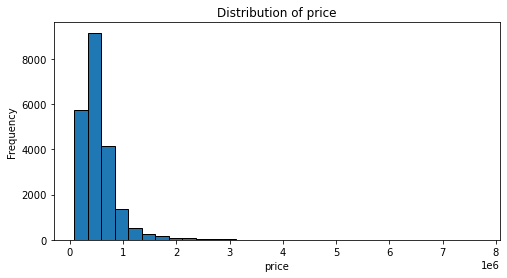

Column: price
Unique Values Count: 3625
Counts of Repetitive Unique Values:
450000.0    172
350000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
919000.0      1
364988.0      1
362764.0      1
849900.0      1
685530.0      1
Name: price, Length: 3625, dtype: int64




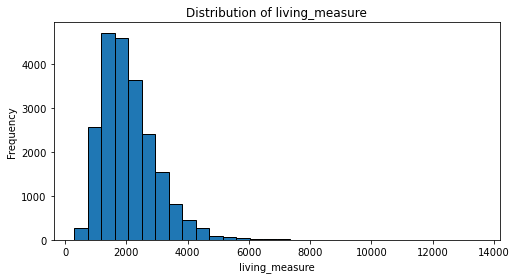

Column: living_measure
Unique Values Count: 1038
Counts of Repetitive Unique Values:
1300.0    138
1400.0    134
1440.0    133
1010.0    129
1800.0    129
         ... 
1728.0      1
5240.0      1
2105.0      1
3845.0      1
2253.0      1
Name: living_measure, Length: 1038, dtype: int64




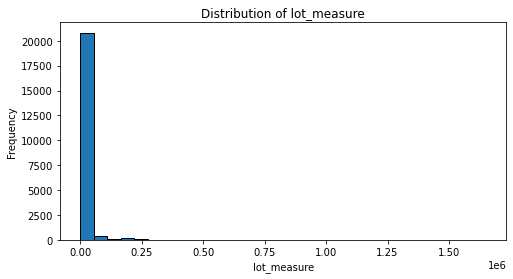

Column: lot_measure
Unique Values Count: 9765
Counts of Repetitive Unique Values:
5000.0      356
6000.0      290
4000.0      251
7200.0      219
4800.0      120
           ... 
641203.0      1
913.0         1
12286.0       1
8749.0        1
60467.0       1
Name: lot_measure, Length: 9765, dtype: int64




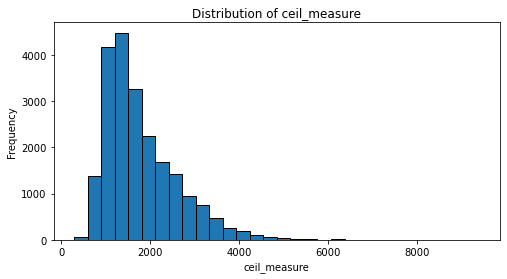

Column: ceil_measure
Unique Values Count: 946
Counts of Repetitive Unique Values:
1300.0    212
1010.0    210
1200.0    206
1220.0    192
1140.0    184
         ... 
2481.0      1
1728.0      1
2105.0      1
3845.0      1
2253.0      1
Name: ceil_measure, Length: 946, dtype: int64




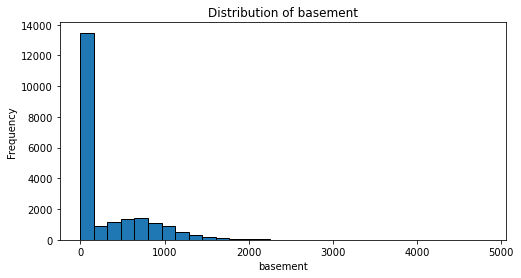

Column: basement
Unique Values Count: 306
Counts of Repetitive Unique Values:
0.0       13125
600.0       221
700.0       218
500.0       214
800.0       206
          ...  
4130.0        1
2050.0        1
784.0         1
518.0         1
2180.0        1
Name: basement, Length: 306, dtype: int64




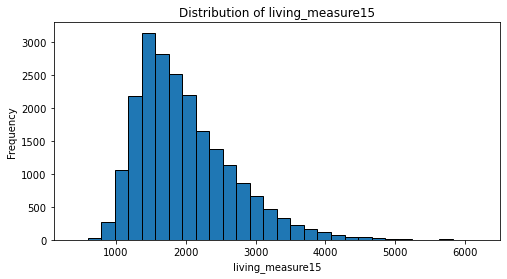

Column: living_measure15
Unique Values Count: 774
Counts of Repetitive Unique Values:
1540.0    197
1440.0    193
1560.0    192
1500.0    178
1580.0    167
         ... 
1813.0      1
1336.0      1
2005.0      1
2049.0      1
1786.0      1
Name: living_measure15, Length: 774, dtype: int64




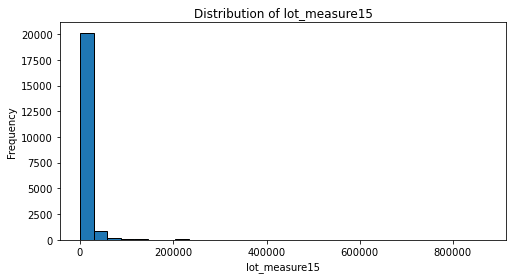

Column: lot_measure15
Unique Values Count: 8682
Counts of Repetitive Unique Values:
5000.0    427
4000.0    357
6000.0    287
7200.0    211
4800.0    145
         ... 
4862.0      1
5228.0      1
9354.0      1
2378.0      1
7604.0      1
Name: lot_measure15, Length: 8682, dtype: int64




TypeError: '<=' not supported between instances of 'float' and 'str'

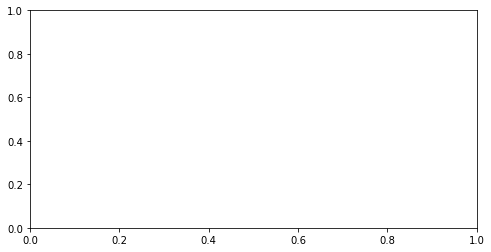

In [135]:
# Numerical attributes
numerical_attributes = ['price', 'living_measure', 'lot_measure', 'ceil_measure', 'basement', 'living_measure15', 'lot_measure15', 'total_area']

# Create bar plots and count unique values and their occurrences
for column in numerical_attributes:
    plt.figure(figsize=(8, 4))
    plt.hist(df[column], bins=30, edgecolor='k')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')
    plt.show()

    # Count unique values
    unique_values_count = df[column].nunique()

    # Count occurrences of each unique value
    unique_value_counts = df[column].value_counts()

    print(f"Column: {column}")
    print(f"Unique Values Count: {unique_values_count}")
    print(f"Counts of Repetitive Unique Values:")
    print(unique_value_counts)
    print("\n")


In [35]:
# Select numerical attributes
numerical_attributes = ['price', 'living_measure', 'lot_measure', 'ceil_measure', 'basement', 'living_measure15', 'lot_measure15', 'total_area']

# Calculate and print the descriptive statistics for each numerical attribute
for column in numerical_attributes:
    stats = df_copy_1[column].describe()
    print(f"Descriptive Statistics for {column}:")
    print(f"Mean: {stats['mean']:.2f}")
    print(f"Median: {stats['50%']:.2f}")
    print(f"Q1: {stats['25%']:.2f}")
    print(f"Q3: {stats['75%']:.2f}")
    print(f"IQR: {stats['75%'] - stats['25%']:.2f}")
    print(f"Min: {stats['min']:.2f}")
    print(f"Max: {stats['max']:.2f}")
    print("\n")


Descriptive Statistics for price:
Mean: 540182.16
Median: 450000.00
Q1: 321950.00
Q3: 645000.00
IQR: 323050.00
Min: 75000.00
Max: 7700000.00


Descriptive Statistics for living_measure:
Mean: 2079.86
Median: 1910.00
Q1: 1429.25
Q3: 2550.00
IQR: 1120.75
Min: 290.00
Max: 13540.00


Descriptive Statistics for lot_measure:
Mean: 15104.58
Median: 7618.00
Q1: 5040.00
Q3: 10684.50
IQR: 5644.50
Min: 520.00
Max: 1651359.00


Descriptive Statistics for ceil_measure:
Mean: 1788.37
Median: 1560.00
Q1: 1190.00
Q3: 2210.00
IQR: 1020.00
Min: 290.00
Max: 9410.00


Descriptive Statistics for basement:
Mean: 291.52
Median: 0.00
Q1: 0.00
Q3: 560.00
IQR: 560.00
Min: 0.00
Max: 4820.00


Descriptive Statistics for living_measure15:
Mean: 1987.07
Median: 1840.00
Q1: 1490.00
Q3: 2360.00
IQR: 870.00
Min: 399.00
Max: 6210.00


Descriptive Statistics for lot_measure15:
Mean: 12766.54
Median: 7620.00
Q1: 5100.00
Q3: 10087.00
IQR: 4987.00
Min: 651.00
Max: 871200.00


Descriptive Statistics for total_area:
Mean: 17

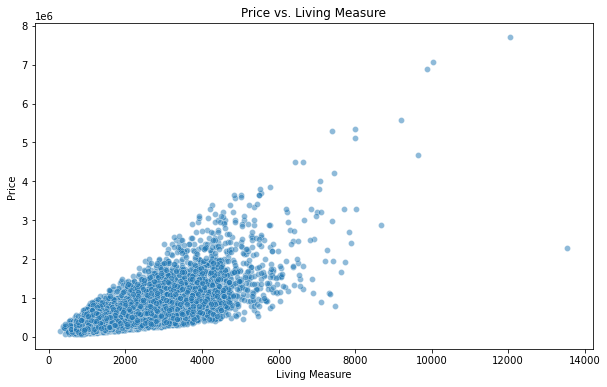

Correlation Coefficient: nan


In [36]:
#Price vs. Living Measure (Scatter Plot):
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_copy_1, x='living_measure', y='price', alpha=0.5)
plt.title('Price vs. Living Measure')
plt.xlabel('Living Measure')
plt.ylabel('Price')
plt.show()

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(df_copy_1['living_measure'], df_copy_1['price'])[0, 1]

# Print the correlation coefficient
print(f'Correlation Coefficient: {correlation_coefficient:.2f}')

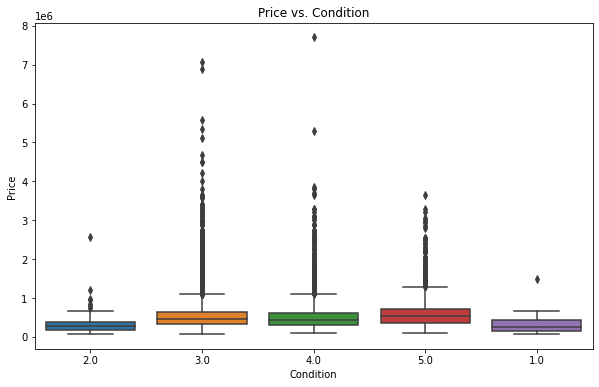

In [136]:
#Price vs. Condition (Box Plot):
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_copy_1, x='condition', y='price')
plt.title('Price vs. Condition')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.show()


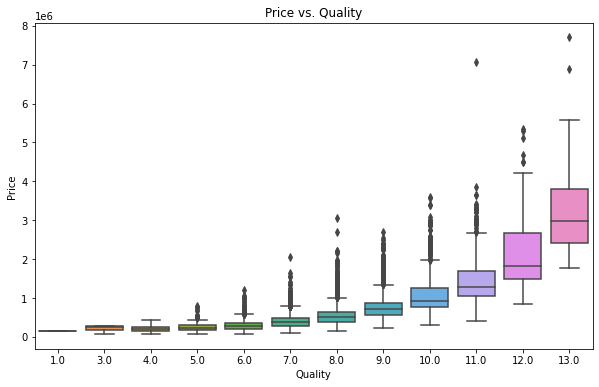

In [137]:
#Price vs. Quality (Box Plot):
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_copy_1, x='quality', y='price')
plt.title('Price vs. Quality')
plt.xlabel('Quality')
plt.ylabel('Price')
plt.show()

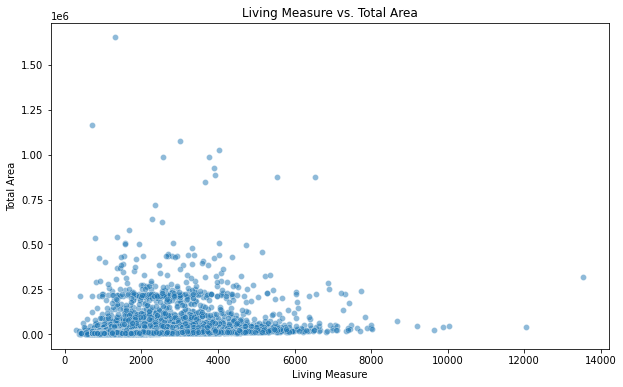

In [39]:
#Living Measure vs. Total Area (Scatter Plot):
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_copy_1, x='living_measure', y='total_area', alpha=0.5)
plt.title('Living Measure vs. Total Area')
plt.xlabel('Living Measure')
plt.ylabel('Total Area')
plt.show()

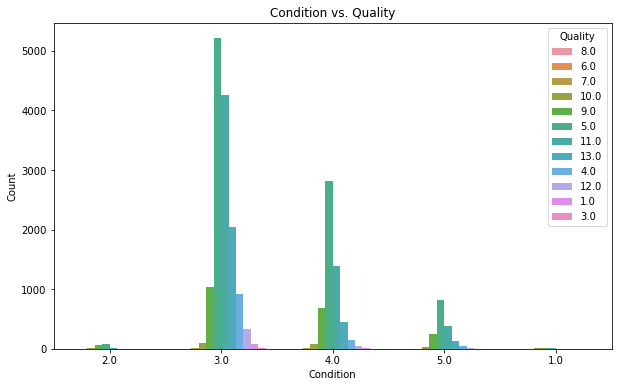

In [138]:
##Condition vs. Quality (Count Plot):
plt.figure(figsize=(10, 6))
sns.countplot(data=df_copy_1, x='condition', hue='quality')
plt.title('Condition vs. Quality')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.legend(title='Quality', loc='upper right', labels=df_copy_1['quality'].unique())
plt.show()

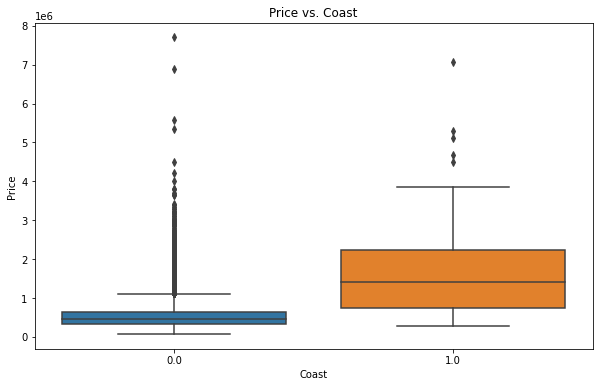

In [139]:
##Price vs. Coast (Box Plot):
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_copy_1, x='coast', y='price')
plt.title('Price vs. Coast')
plt.xlabel('Coast')
plt.ylabel('Price')
plt.show()


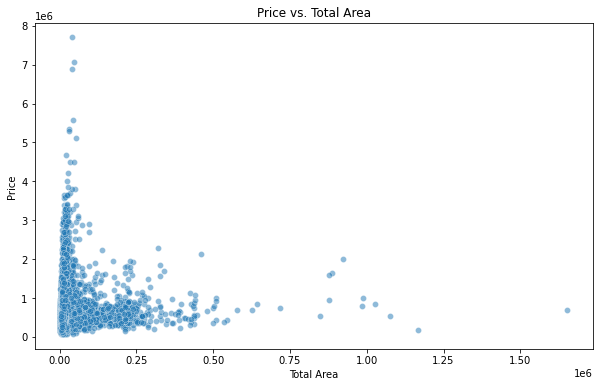

In [140]:
##price and the total area of houses:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_copy_1, x='total_area', y='price', alpha=0.5)
plt.title('Price vs. Total Area')
plt.xlabel('Total Area')
plt.ylabel('Price')
plt.show()

condition  1.0  2.0    3.0   4.0   5.0
coast                                 
0.0         29  170  13869  5599  1670
1.0          1    1     89    50    20


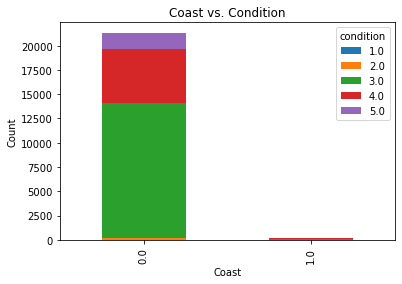

In [141]:
# Create a cross-tabulation
cross_tab = pd.crosstab(df_copy_1['coast'], df_copy_1['condition'])

# Display the cross-tabulation
print(cross_tab)

# Create a stacked bar plot to visualize the relationship
cross_tab.plot(kind='bar', stacked=True)
plt.title('Coast vs. Condition')
plt.xlabel('Coast')
plt.ylabel('Count')
plt.show()


Cross-tabulation summary for Ceil vs. Condition:
condition  1.0  2.0   3.0   4.0   5.0
ceil                                 
1.0         23  136  5498  3867  1078
1.5          5   16   873   674   330
2.0          2   19  6853  1051   253
2.5          0    0   103    39    19
3.0          0    0   593    12     5
3.5          0    0     7     0     1


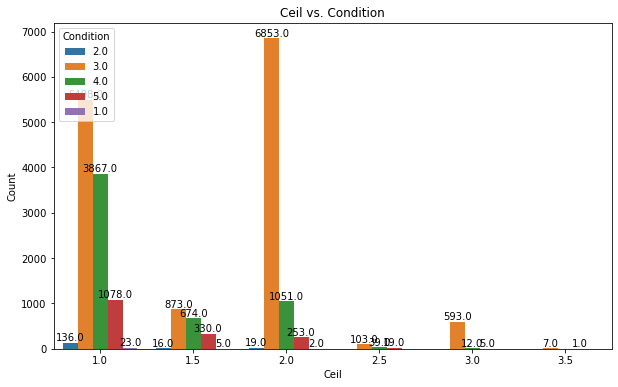

Cross-tabulation summary for Coast vs. Quality:
quality  1.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   10.0  11.0  12.0  \
coast                                                                       
0.0         1     3    29   238  2024  8946  6018  2586  1106   378    79   
1.0         0     0     0     4    12    23    39    24    28    20    11   

quality  13.0  
coast          
0.0        13  
1.0         0  


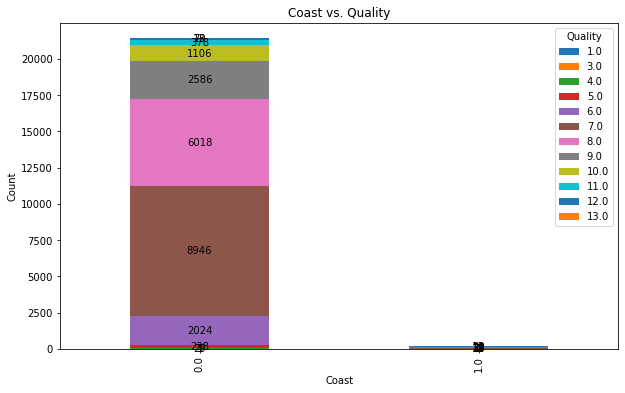

Cross-tabulation summary for Sight vs. Furnished:
furnished    0.0   1.0
sight                 
0.0        16113  3295
1.0          223   109
2.0          595   364
3.0          239   271
4.0          121   197


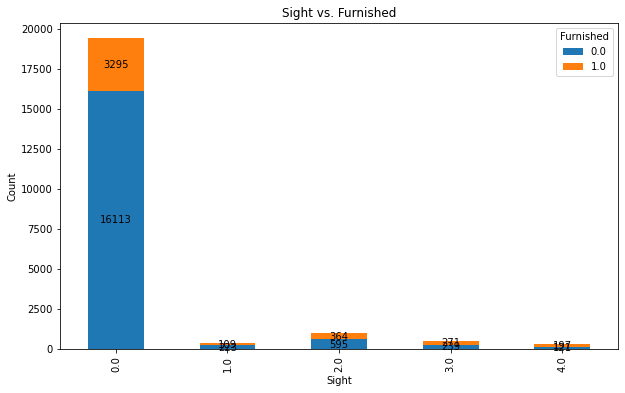

Summary statistics for Condition vs. Room_bed:
             count  unique  top    freq
condition                              
1.0           30.0     6.0  2.0    12.0
2.0          171.0     7.0  3.0    69.0
3.0        13933.0    12.0  3.0  6258.0
4.0         5636.0    10.0  3.0  2689.0
5.0         1689.0     9.0  3.0   724.0


AttributeError: 'PathPatch' object has no attribute 'get_x'

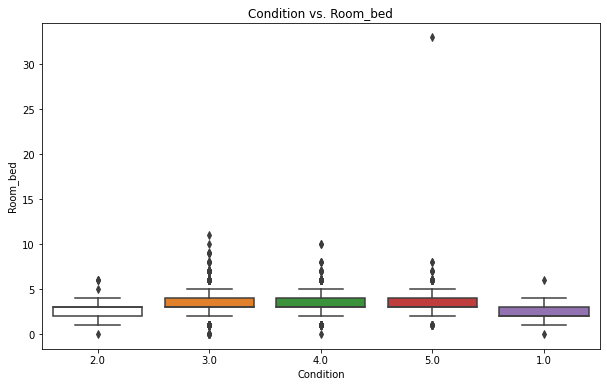

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example 1: Ceil vs. Condition
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_copy_1, x='ceil', hue='condition')
plt.title('Ceil vs. Condition')
plt.xlabel('Ceil')
plt.ylabel('Count')
plt.legend(title='Condition')

# Print metric summary
cross_tab = pd.crosstab(df_copy_1['ceil'], df_copy_1['condition'])
print("Cross-tabulation summary for Ceil vs. Condition:")
print(cross_tab)

# Add labels to the countplot
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

# Example 2: Coast vs. Quality (Cross-tabulation)
cross_tab = pd.crosstab(df_copy_1['coast'], df_copy_1['quality'])
ax = cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Coast vs. Quality')
plt.xlabel('Coast')
plt.ylabel('Count')
plt.legend(title='Quality')

# Print metric summary
print("Cross-tabulation summary for Coast vs. Quality:")
print(cross_tab)

# Add labels to the bar plot
for container in ax.containers:
    ax.bar_label(container, label_type='center', color='black')

plt.show()

# Example 3: Sight vs. Furnished (Cross-tabulation)
cross_tab = pd.crosstab(df_copy_1['sight'], df_copy_1['furnished'])
ax = cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sight vs. Furnished')
plt.xlabel('Sight')
plt.ylabel('Count')
plt.legend(title='Furnished')

# Print metric summary
print("Cross-tabulation summary for Sight vs. Furnished:")
print(cross_tab)

# Add labels to the bar plot
for container in ax.containers:
    ax.bar_label(container, label_type='center', color='black')

plt.show()

# Example 4: Condition vs. Room_bed
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_copy_1, x='condition', y='room_bed')
plt.title('Condition vs. Room_bed')
plt.xlabel('Condition')
plt.ylabel('Room_bed')

# Print metric summary
summary = df_copy_1.groupby('condition')['room_bed'].describe()
print("Summary statistics for Condition vs. Room_bed:")
print(summary)

# Add labels to the box plot
for i, box in enumerate(plt.gca().artists):
    if i % 5 == 0:  # Adjust the interval for labeling
        box.set_facecolor('white')  # Make the box background white
        plt.annotate(f"{int(summary['count'].iloc[i])}", (box.get_x() + box.get_width() / 2, box.get_y() + box.get_height()), 
                     ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

# Example 5: Quality vs. Room_bath
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_copy_1, x='quality', y='room_bath')
plt.title('Quality vs. Room_bath')
plt.xlabel('Quality')
plt.ylabel('Room_bath')

# Print metric summary
summary = df_copy_1.groupby('quality')['room_bath'].describe()
print("Summary statistics for Quality vs. Room_bath:")
print(summary)

# Add labels to the box plot
for i, box in enumerate(plt.gca().artists):
    if i % 5 == 0:  # Adjust the interval for labeling
        box.set_facecolor('white')  # Make the box background white
        plt.annotate(f"{int(summary['count'].iloc[i])}", (box.get_x() + box.get_width() / 2, box.get_y() + box.get_height()), 
                     ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

Cross-tabulation summary for Ceil vs. Condition:
condition  1.0  2.0   3.0   4.0   5.0
ceil                                 
1.0         23  136  5498  3867  1078
1.5          5   16   873   674   330
2.0          2   19  6853  1051   253
2.5          0    0   103    39    19
3.0          0    0   593    12     5
3.5          0    0     7     0     1


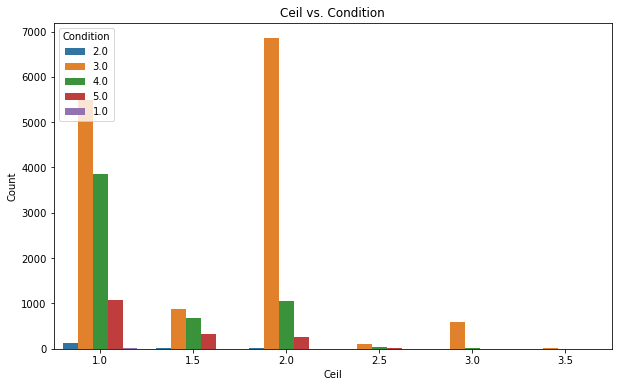

Cross-tabulation summary for Coast vs. Quality:
quality  1.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   10.0  11.0  12.0  \
coast                                                                       
0.0         1     3    29   238  2024  8946  6018  2586  1106   378    79   
1.0         0     0     0     4    12    23    39    24    28    20    11   

quality  13.0  
coast          
0.0        13  
1.0         0  


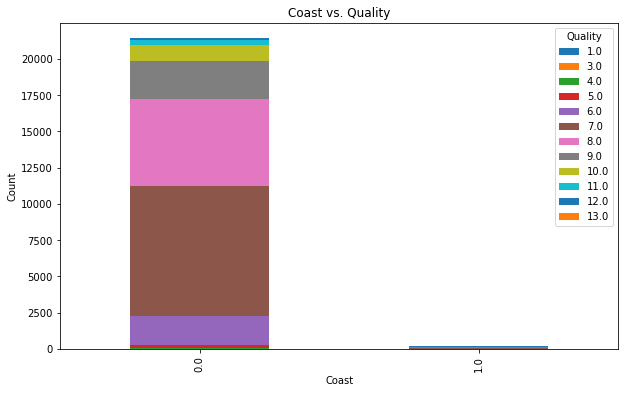

Cross-tabulation summary for Sight vs. Furnished:
furnished    0.0   1.0
sight                 
0.0        16113  3295
1.0          223   109
2.0          595   364
3.0          239   271
4.0          121   197


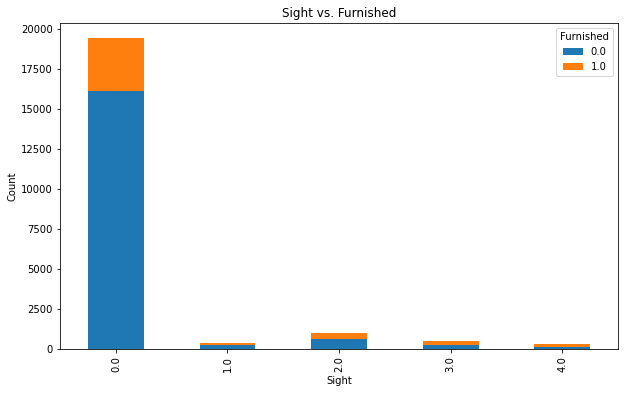

Summary statistics for Condition vs. Room_bed:
             count  unique  top    freq
condition                              
1.0           30.0     6.0  2.0    12.0
2.0          171.0     7.0  3.0    69.0
3.0        13933.0    12.0  3.0  6258.0
4.0         5636.0    10.0  3.0  2689.0
5.0         1689.0     9.0  3.0   724.0


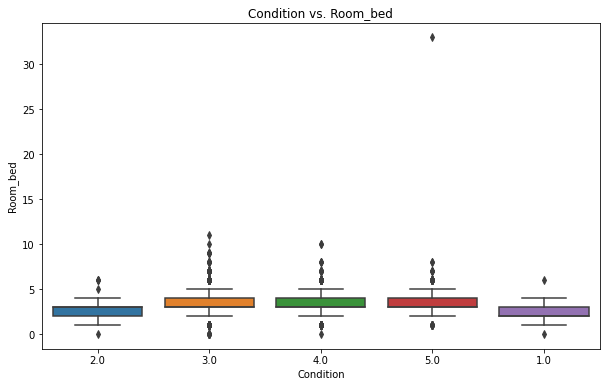

Summary statistics for Quality vs. Room_bath:
          count  unique  top    freq
quality                             
1.0         1.0     1.0  0.0     1.0
3.0         3.0     2.0  0.0     2.0
4.0        29.0     3.0  1.0    14.0
5.0       242.0     8.0  1.0   190.0
6.0      2030.0    13.0  1.0  1406.0
7.0      8929.0    21.0  1.0  2071.0
8.0      6039.0    21.0  2.5  2271.0
9.0      2600.0    17.0  2.5  1219.0
10.0     1130.0    17.0  2.5   384.0
11.0      398.0    20.0  3.5    83.0
12.0       90.0    19.0  3.5    20.0
13.0       13.0    12.0  5.5     2.0


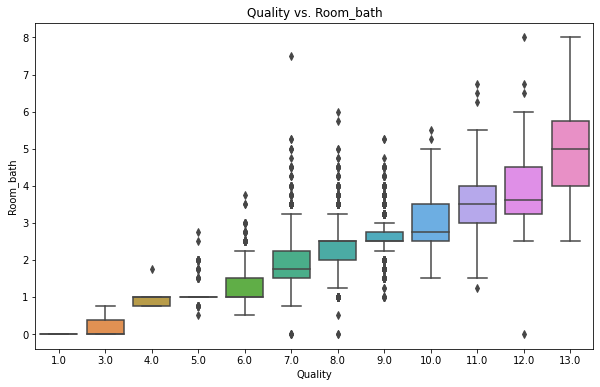

In [142]:
# Example 1: Ceil vs. Condition
plt.figure(figsize=(10, 6))
sns.countplot(data=df_copy_1, x='ceil', hue='condition')
plt.title('Ceil vs. Condition')
plt.xlabel('Ceil')
plt.ylabel('Count')
plt.legend(title='Condition')

# Print metric summary
cross_tab = pd.crosstab(df_copy_1['ceil'], df_copy_1['condition'])
print("Cross-tabulation summary for Ceil vs. Condition:")
print(cross_tab)

plt.show()

# Example 2: Coast vs. Quality (Cross-tabulation)
cross_tab = pd.crosstab(df_copy_1['coast'], df_copy_1['quality'])
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Coast vs. Quality')
plt.xlabel('Coast')
plt.ylabel('Count')
plt.legend(title='Quality')

# Print metric summary
print("Cross-tabulation summary for Coast vs. Quality:")
print(cross_tab)

plt.show()

# Example 3: Sight vs. Furnished (Cross-tabulation)
cross_tab = pd.crosstab(df_copy_1['sight'], df_copy_1['furnished'])
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sight vs. Furnished')
plt.xlabel('Sight')
plt.ylabel('Count')
plt.legend(title='Furnished')

# Print metric summary
print("Cross-tabulation summary for Sight vs. Furnished:")
print(cross_tab)

plt.show()

# Example 4: Condition vs. Room_bed
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_copy_1, x='condition', y='room_bed')
plt.title('Condition vs. Room_bed')
plt.xlabel('Condition')
plt.ylabel('Room_bed')

# Print metric summary
summary = df_copy_1.groupby('condition')['room_bed'].describe()
print("Summary statistics for Condition vs. Room_bed:")
print(summary)

plt.show()

# Example 5: Quality vs. Room_bath
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_copy_1, x='quality', y='room_bath')
plt.title('Quality vs. Room_bath')
plt.xlabel('Quality')
plt.ylabel('Room_bath')

# Print metric summary
summary = df_copy_1.groupby('quality')['room_bath'].describe()
print("Summary statistics for Quality vs. Room_bath:")
print(summary)

plt.show()


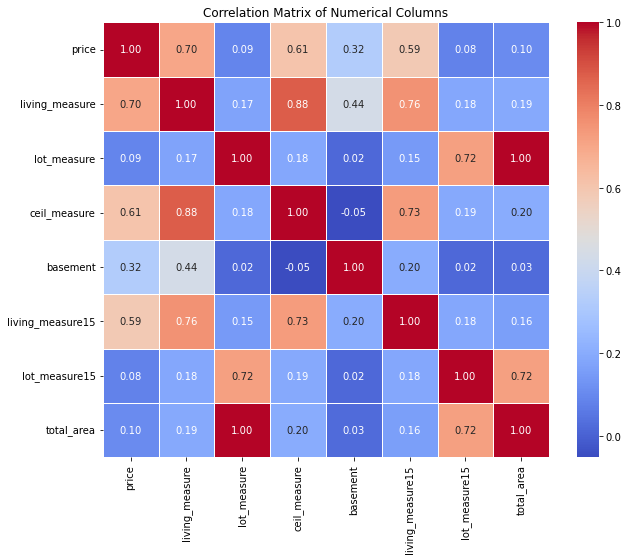

Correlation Matrix:
                     price  living_measure  lot_measure  ceil_measure  \
price             1.000000        0.702149     0.089733      0.605593   
living_measure    0.702149        1.000000     0.172958      0.876653   
lot_measure       0.089733        0.172958     1.000000      0.183656   
ceil_measure      0.605593        0.876653     0.183656      1.000000   
basement          0.323825        0.435035     0.015400     -0.051925   
living_measure15  0.585186        0.756188     0.145653      0.731558   
lot_measure15     0.082603        0.183548     0.717727      0.194246   
total_area        0.104929        0.194346     0.999764      0.202209   

                  basement  living_measure15  lot_measure15  total_area  
price             0.323825          0.585186       0.082603    0.104929  
living_measure    0.435035          0.756188       0.183548    0.194346  
lot_measure       0.015400          0.145653       0.717727    0.999764  
ceil_measure     -0.051925

In [143]:
# Select numerical columns
numerical_columns = ['price', 'living_measure', 'lot_measure', 'ceil_measure', 'basement', 'living_measure15', 'lot_measure15', 'total_area']

# Calculate the correlation matrix
correlation_matrix = df_copy_1[numerical_columns].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

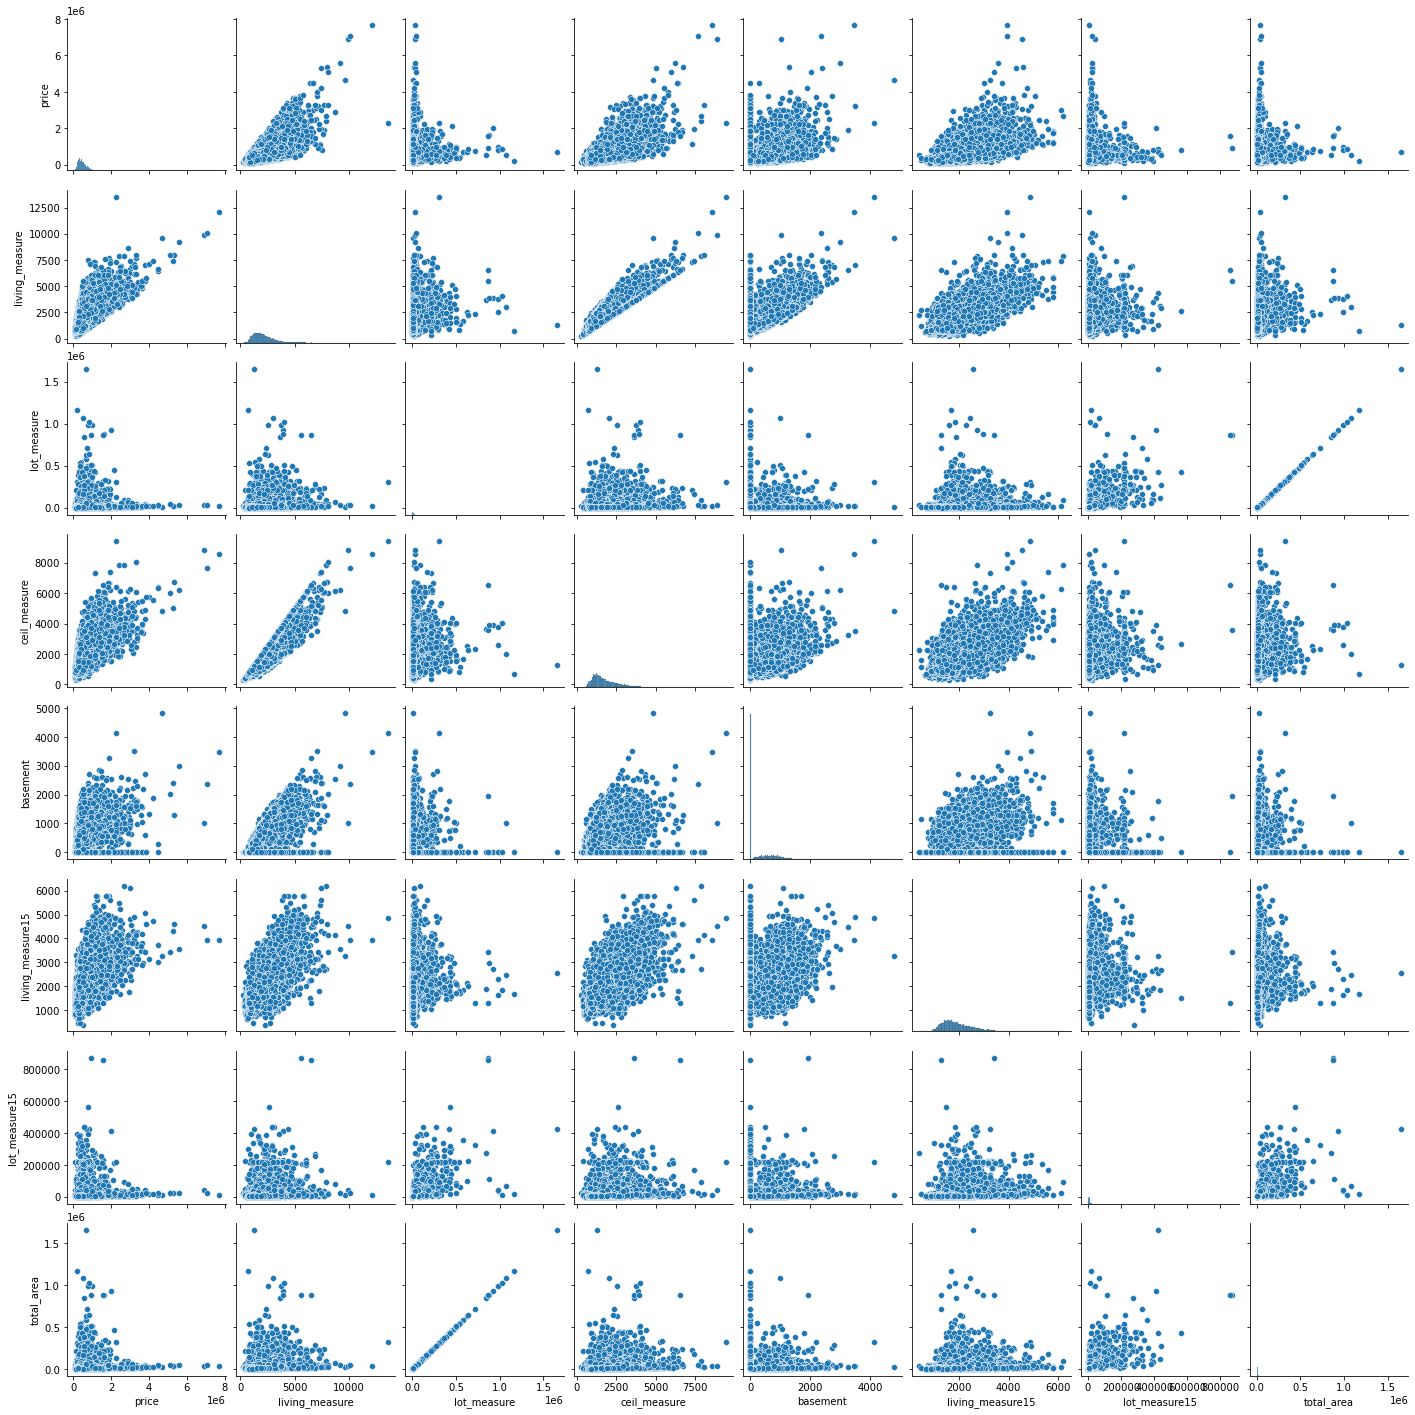

In [144]:
# Select numerical columns
numerical_columns = ['price', 'living_measure', 'lot_measure', 'ceil_measure', 'basement', 'living_measure15', 'lot_measure15', 'total_area']

# Create a pair plot
sns.pairplot(df_copy_1[numerical_columns])
plt.show()


Columns with Positively Correlated Relationships:
                     price  living_measure  lot_measure  ceil_measure  \
price                  NaN        0.702149          NaN      0.605593   
living_measure    0.702149             NaN          NaN      0.876653   
lot_measure            NaN             NaN          NaN           NaN   
ceil_measure      0.605593        0.876653          NaN           NaN   
basement               NaN             NaN          NaN           NaN   
living_measure15  0.585186        0.756188          NaN      0.731558   
lot_measure15          NaN             NaN     0.717727           NaN   
total_area             NaN             NaN     0.999764           NaN   

                  living_measure15  lot_measure15  total_area  
price                     0.585186            NaN         NaN  
living_measure            0.756188            NaN         NaN  
lot_measure                    NaN       0.717727    0.999764  
ceil_measure              0.731558  

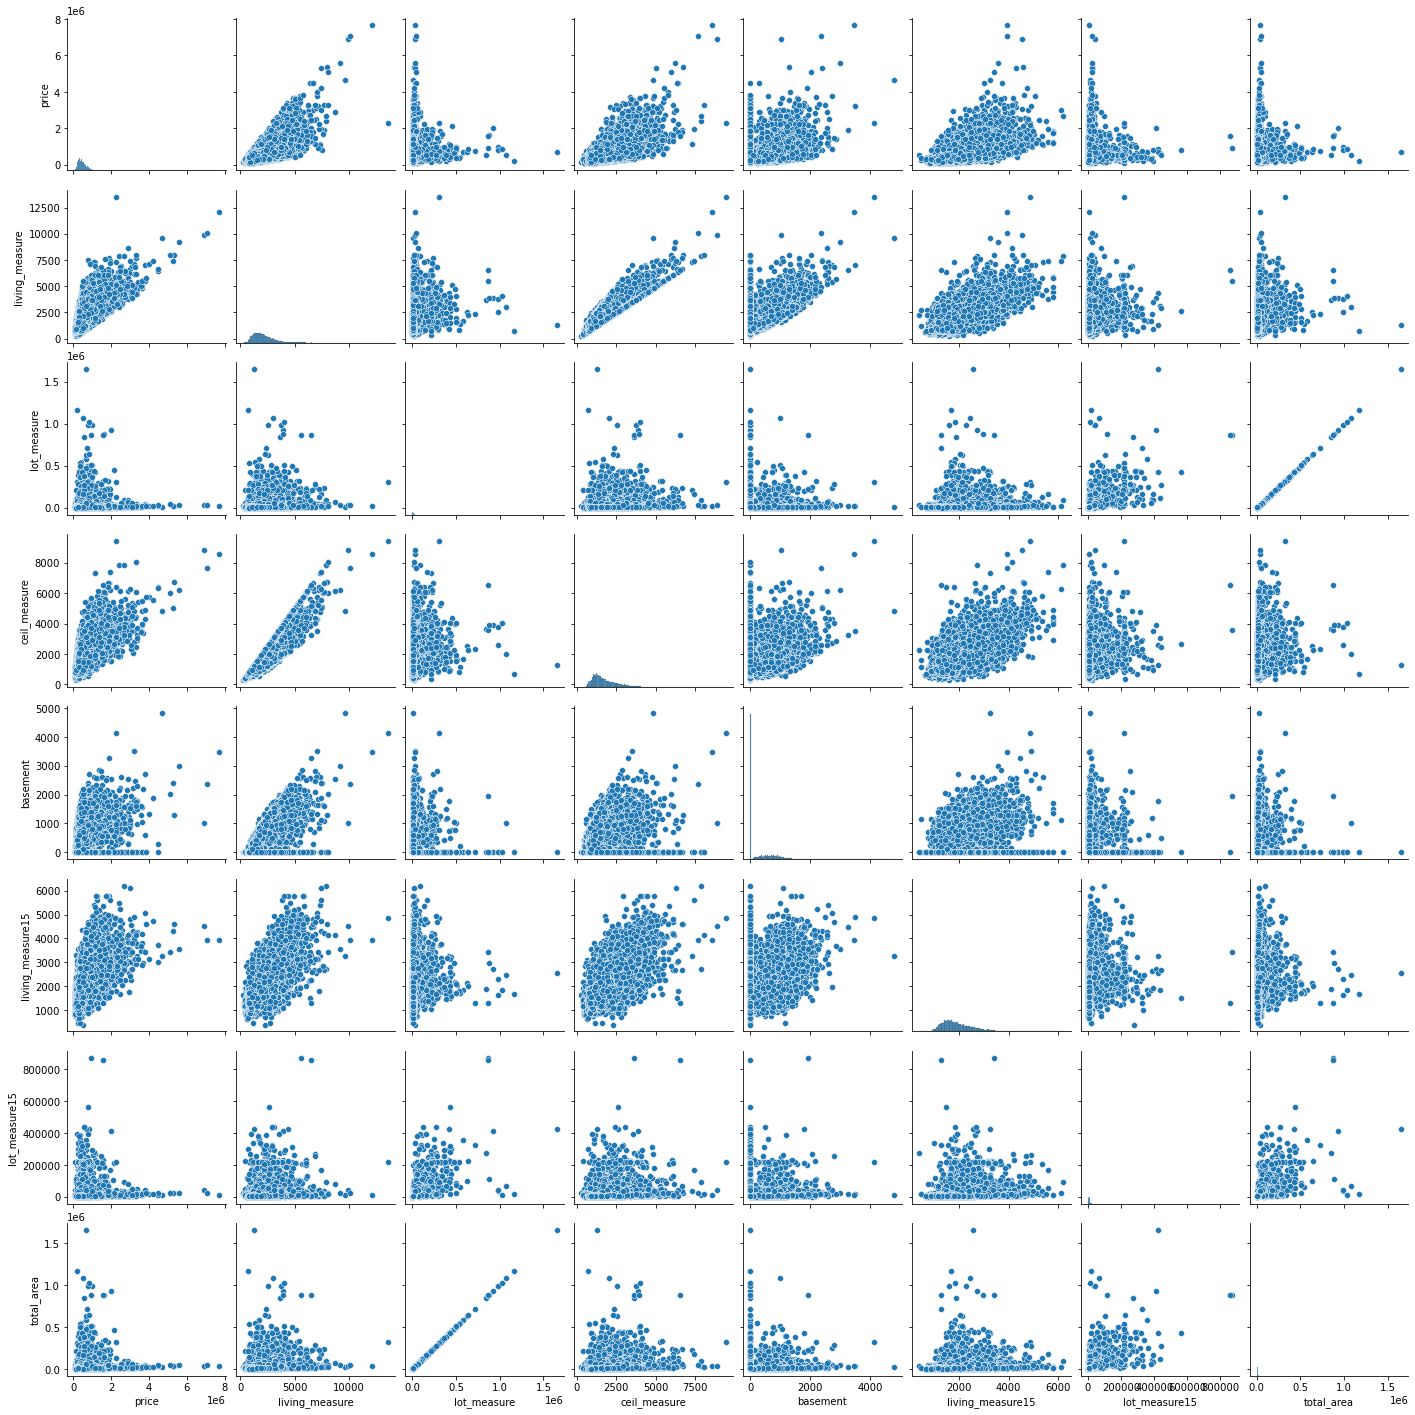

In [145]:
# Select numerical columns
numerical_columns = ['price', 'living_measure', 'lot_measure', 'ceil_measure', 'basement', 'living_measure15', 'lot_measure15', 'total_area']

# Create a pair plot
pair_plot = sns.pairplot(df_copy_1[numerical_columns])

# Print columns with positively correlated relationships
correlation_matrix = df_copy_1[numerical_columns].corr()
positive_correlations = correlation_matrix[correlation_matrix > 0.5]
positive_correlations = positive_correlations[positive_correlations < 1.0].dropna(how='all', axis=1)

print("Columns with Positively Correlated Relationships:")
print(positive_correlations)

# Show the pair plot
plt.show()


In [47]:
# Count missing values in the entire dataset
total_missing = df_copy_1.isnull().sum().sum()

# Calculate the percentage of missing values in the entire dataset
total_rows, total_columns = df_copy_1.shape
percentage_missing = (total_missing / (total_rows * total_columns)) * 100

# Count missing values in each column
missing_values_per_column = df_copy_1.isnull().sum()

# Calculate the percentage of missing values for each column
percentage_missing_per_column = (missing_values_per_column / total_rows) * 100

# Create a DataFrame to display the results
missing_info = pd.DataFrame({
    'Total Missing Values': missing_values_per_column,
    'Percentage Missing': percentage_missing_per_column
})

# Sort columns by the percentage of missing values
missing_info = missing_info.sort_values(by='Percentage Missing', ascending=False)

# Print the total missing values and percentage for the entire dataset
print(f"Total Missing Values in the Entire Dataset: {total_missing}")
print(f"Percentage of Missing Values in the Entire Dataset: {percentage_missing:.2f}%\n")

# Print missing values information for each column
print("Missing Values per Column:")
print(missing_info)


Total Missing Values in the Entire Dataset: 43176
Percentage of Missing Values in the Entire Dataset: 6.66%

Missing Values per Column:
                  Total Missing Values  Percentage Missing
dayhours                         21613          100.000000
yr_renovated                     20699           95.771064
living_measure15                   166            0.768056
room_bed                           108            0.499699
room_bath                          108            0.499699
condition                           85            0.393282
ceil                                72            0.333133
total_area                          68            0.314625
sight                               57            0.263730
lot_measure                         42            0.194327
long                                34            0.157313
coast                               31            0.143432
furnished                           29            0.134179
lot_measure15                       29

In [48]:
# Create a copy of the DataFrame
df_copy_2 = df_copy_1.copy()

# Drop columns with high missing values
df_copy_2 = df_copy_2.drop(['dayhours', 'yr_renovated'], axis=1)

# Verify the columns have been dropped
print(df_copy_2.shape)  # Check the new shape of the DataFrame


(21613, 28)


In [49]:
# Create a copy of the dataset
df_copy_3 = df_copy_2.copy()

# Select numerical columns for outlier treatment
numerical_columns = ['price','living_measure', 'lot_measure', 'ceil_measure', 'basement', 'living_measure15', 'lot_measure15', 'total_area']

# Function to identify and treat outliers using the IQR method
def treat_outliers_iqr(data, attribute):
    Q1 = data[attribute].quantile(0.25)
    Q3 = data[attribute].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = data[(data[attribute] < lower_bound) | (data[attribute] > upper_bound)]
    
    # Treat outliers by capping them to the lower and upper bounds
    data.loc[data[attribute] < lower_bound, attribute] = lower_bound
    data.loc[data[attribute] > upper_bound, attribute] = upper_bound

# Treat outliers in numerical columns
for column in numerical_columns:
    treat_outliers_iqr(df_copy_3, column)


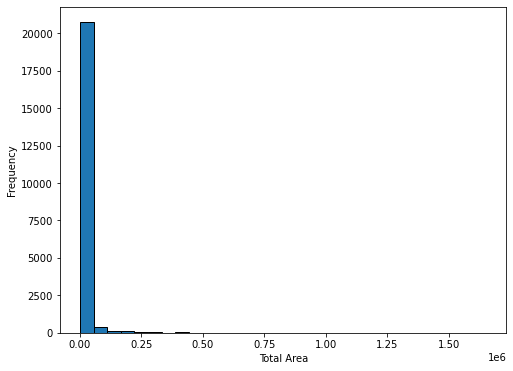

In [50]:
# Plot a histogram of 'total_area' before outlier treatment
plt.figure(figsize=(8, 6))
plt.hist(df_copy_2['total_area'], bins=30, edgecolor='k')
plt.xlabel('Total Area')
plt.ylabel('Frequency')
plt.show()


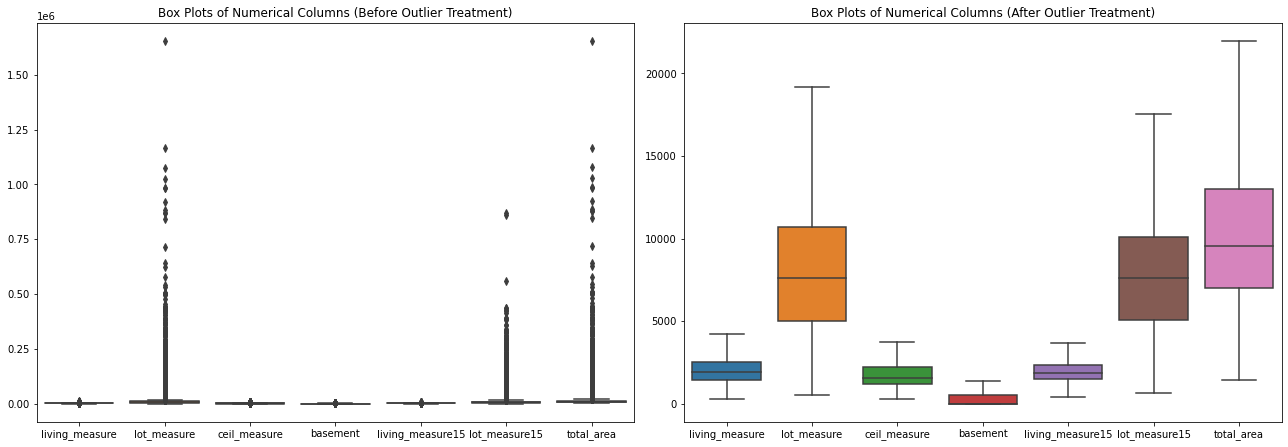

In [51]:
# Select numerical columns for visualization excluding price column(to see the unbalanced data)
numerical_columns = ['living_measure', 'lot_measure', 'ceil_measure', 'basement', 'living_measure15', 'lot_measure15', 'total_area']

# Create subplots for box plots
plt.figure(figsize=(18, 12))

# Before outlier treatment
plt.subplot(2, 2, 1)
sns.boxplot(data=df_copy_2[numerical_columns])
plt.title('Box Plots of Numerical Columns (Before Outlier Treatment)')

# After outlier treatment
plt.subplot(2, 2, 2)
sns.boxplot(data=df_copy_3[numerical_columns])
plt.title('Box Plots of Numerical Columns (After Outlier Treatment)')

plt.tight_layout()
plt.show()

In [52]:
# Impute missing values with median for numerical columns
numerical_columns = ['price','living_measure', 'lot_measure', 'ceil_measure', 'basement', 'living_measure15', 'lot_measure15', 'total_area']
df_copy_3[numerical_columns] = df_copy_3[numerical_columns].fillna(df_copy_3[numerical_columns].median())

In [53]:
# Impute missing values with mode for categorical columns
categorical_columns = ['room_bed', 'room_bath', 'condition', 'ceil', 'coast', 'sight', 'furnished', 'quality']
df_copy_3[categorical_columns] = df_copy_3[categorical_columns].fillna(df_copy_3[categorical_columns].mode().iloc[0])


In [54]:
# Verify that there are no more missing values
missing_values = df_copy_3.isnull().sum()
print("Missing Values After Imputation:")
print(missing_values[missing_values > 0])

Missing Values After Imputation:
yr_built    15
long        34
dtype: int64


In [55]:
# Check the first few rows of the updated dataset
print("\nFirst Few Rows of the Updated Dataset:")
print(df_copy_3.head())


First Few Rows of the Updated Dataset:
            cid     price  room_bed  room_bath  living_measure  lot_measure  \
0  3.876101e+09  600000.0       4.0       1.75          3050.0       9440.0   
1  3.145600e+09  190000.0       2.0       1.00           670.0       3101.0   
2  7.129303e+09  735000.0       4.0       2.75          3040.0       2415.0   
3  7.338220e+09  257000.0       3.0       2.50          1740.0       3721.0   
4  7.950301e+09  450000.0       2.0       1.00          1120.0       4590.0   

   ceil  coast  sight  condition  quality  ceil_measure  basement   yr_built  \
0   1.0    0.0    0.0        3.0      8.0        1800.0    1250.0 1966-01-01   
1   1.0    0.0    0.0        4.0      6.0         670.0       0.0 1948-01-01   
2   2.0    1.0    4.0        3.0      8.0        3040.0       0.0 1966-01-01   
3   2.0    0.0    0.0        3.0      8.0        1740.0       0.0 2009-01-01   
4   1.0    0.0    0.0        3.0      7.0        1120.0       0.0 1924-01-01   

   z

In [56]:
# Impute missing values in 'yr_built' with the median year
median_year = df_copy_3['yr_built'].median()
df_copy_3['yr_built'].fillna(median_year, inplace=True)

# Impute missing values in 'long' with a placeholder value (e.g., NaN)
df_copy_3['long'].fillna(np.nan, inplace=True)

In [57]:
# Replace missing values in 'long' with 0
df_copy_3['long'].fillna(0, inplace=True)

In [58]:
# Verify that there are no more missing values
missing_values = df_copy_3.isnull().sum()
print("Missing Values After Imputation:")
print(missing_values[missing_values > 0])

Missing Values After Imputation:
Series([], dtype: int64)


In [59]:
df_copy_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   cid               21613 non-null  float64       
 1   price             21613 non-null  float64       
 2   room_bed          21613 non-null  float64       
 3   room_bath         21613 non-null  float64       
 4   living_measure    21613 non-null  float64       
 5   lot_measure       21613 non-null  float64       
 6   ceil              21613 non-null  float64       
 7   coast             21613 non-null  float64       
 8   sight             21613 non-null  float64       
 9   condition         21613 non-null  float64       
 10  quality           21613 non-null  float64       
 11  ceil_measure      21613 non-null  float64       
 12  basement          21613 non-null  float64       
 13  yr_built          21613 non-null  datetime64[ns]
 14  zipcode           2161

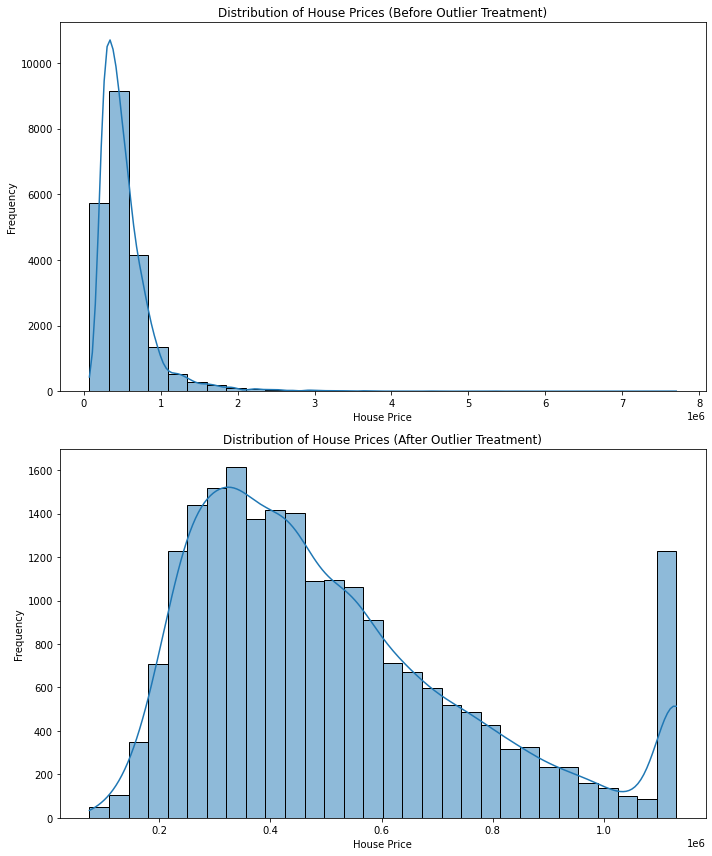

Summary Statistics for House Prices (Before Outlier Treatment):
count    2.161300e+04
mean     5.116076e+05
std      2.500479e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: price, dtype: float64

Summary Statistics for House Prices (After Outlier Treatment):
count    2.161300e+04
mean     5.116076e+05
std      2.500479e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: price, dtype: float64


In [66]:
# Set up subplots for before and after plots
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Plot the histogram of house prices before treating outliers
sns.histplot(df_copy_2['price'], bins=30, kde=True, ax=axes[0])
axes[0].set_xlabel('House Price')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of House Prices (Before Outlier Treatment)')

# Plot the histogram of house prices after treating outliers
sns.histplot(df_copy_4['price'], bins=30, kde=True, ax=axes[1])
axes[1].set_xlabel('House Price')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of House Prices (After Outlier Treatment)')

# Show the plots
plt.tight_layout()
plt.show()

# Print summary statistics for before and after treating outliers
print("Summary Statistics for House Prices (Before Outlier Treatment):")
print(df_copy_3['price'].describe())
print("\nSummary Statistics for House Prices (After Outlier Treatment):")
print(df_copy_4['price'].describe())


In [160]:
# Calculate and print summary statistics for house prices
price_summary = df_copy_2['price'].describe()

print("Summary Statistics for House Prices(Before Outlier Treatment):")
print(price_summary)

# Calculate skewness and kurtosis
skewness = df_copy_2['price'].skew()
kurtosis = df_copy_2['price'].kurt()

print("\nSkewness of House Prices:", skewness)
print("Kurtosis of House Prices:", kurtosis)


Summary Statistics for House Prices(Before Outlier Treatment):
count    2.161300e+04
mean     5.401822e+05
std      3.673622e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

Skewness of House Prices: 4.021715573048685
Kurtosis of House Prices: 34.522444410072566


In [61]:
# Calculate and print summary statistics for house prices
price_summary = df_copy_3['price'].describe()

print("Summary Statistics for House Prices(After Outlier Treatment):")
print(price_summary)

# Calculate skewness and kurtosis
skewness = df_copy_3['price'].skew()
kurtosis = df_copy_3['price'].kurt()

print("\nSkewness of House Prices:", skewness)
print("Kurtosis of House Prices:", kurtosis)


Summary Statistics for House Prices(After Outlier Treatment):
count    2.161300e+04
mean     5.116076e+05
std      2.500479e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: price, dtype: float64

Skewness of House Prices: 0.9371028072955089
Kurtosis of House Prices: 0.20008136923323017


In [62]:
# Calculate the IQR for the price column
Q1 = df_copy_3['price'].quantile(0.25)
Q3 = df_copy_3['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_copy_3[(df_copy_3['price'] < lower_bound) | (df_copy_3['price'] > upper_bound)]

# Print the outliers
print("Outliers in the 'price' column:")
print(outliers)


Outliers in the 'price' column:
Empty DataFrame
Columns: [cid, price, room_bed, room_bath, living_measure, lot_measure, ceil, coast, sight, condition, quality, ceil_measure, basement, yr_built, zipcode, lat, long, living_measure15, lot_measure15, furnished, total_area, date, year, month, day, hour, minute, second]
Index: []


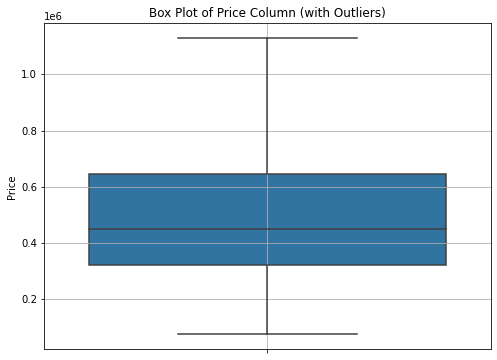

In [63]:

# Create a boxplot to visualize outliers in the 'price' column
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_copy_3, y='price')
plt.title('Box Plot of Price Column (with Outliers)')
plt.ylabel('Price')
plt.grid(True)
plt.show()


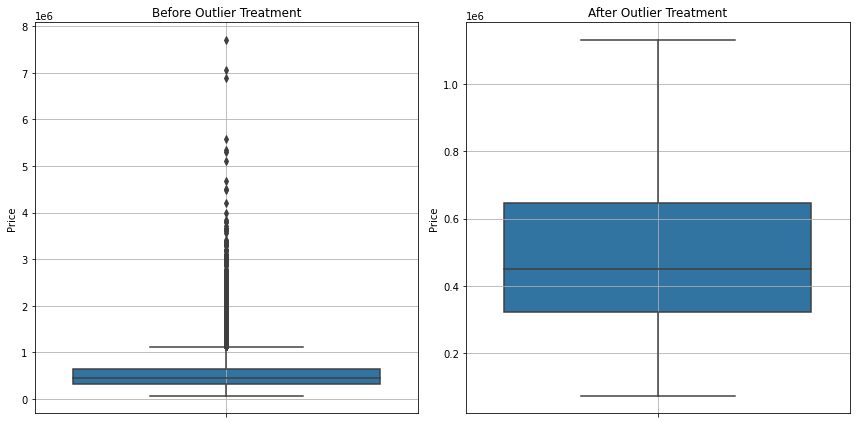

In [64]:

# Create subplots for before and after treating outliers
plt.figure(figsize=(12, 6))

# Subplot 1: Before treating outliers
plt.subplot(1, 2, 1)
sns.boxplot(data=df_copy_2, y='price')
plt.title('Before Outlier Treatment')
plt.ylabel('Price')
plt.grid(True)

# Subplot 2: After treating outliers
plt.subplot(1, 2, 2)
sns.boxplot(data=df_copy_3, y='price')
plt.title('After Outlier Treatment')
plt.ylabel('Price')
plt.grid(True)

plt.tight_layout()
plt.show()

In [65]:
# Create a copy of the DataFrame
df_copy_4 = df_copy_3.copy()

In [67]:
# Save the DataFrame to a CSV file
df_copy_4.to_csv('df_copy_4.csv', index=False)

In [68]:
df_copy_4.head()

,cid,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,date,year,month,day,hour,minute,second
0,3.876101e+09,600000.0,4.0,1.75,3050.0,9440.0,1.0,0.0,0.0,3.0,8.0,1800.0,1250.0,1966-01-01,98034.0,47.7228,-122.183,2020.0,8660.0,0.0,12490.0,1430092800000000000,2015,4,27,0,0,0
1,3.145600e+09,190000.0,2.0,1.00,670.0,3101.0,1.0,0.0,0.0,4.0,6.0,670.0,0.0,1948-01-01,98118.0,47.5546,-122.274,1660.0,4100.0,0.0,3771.0,1426550400000000000,2015,3,17,0,0,0
2,7.129303e+09,735000.0,4.0,2.75,3040.0,2415.0,2.0,1.0,4.0,3.0,8.0,3040.0,0.0,1966-01-01,98118.0,47.5188,-122.256,2620.0,2433.0,0.0,5455.0,1408492800000000000,2014,8,20,0,0,0
3,7.338220e+09,257000.0,3.0,2.50,1740.0,3721.0,2.0,0.0,0.0,3.0,8.0,1740.0,0.0,2009-01-01,98002.0,47.3363,-122.213,2030.0,3794.0,0.0,5461.0,1412899200000000000,2014,10,10,0,0,0
4,7.950301e+09,450000.0,2.0,1.00,1120.0,4590.0,1.0,0.0,0.0,3.0,7.0,1120.0,0.0,1924-01-01,98118.0,47.5663,-122.285,1120.0,5100.0,0.0,5710.0,1424217600000000000,2015,2,18,0,0,0


In [69]:
df_copy_4.head()

,cid,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,date,year,month,day,hour,minute,second
0,3.876101e+09,600000.0,4.0,1.75,3050.0,9440.0,1.0,0.0,0.0,3.0,8.0,1800.0,1250.0,1966-01-01,98034.0,47.7228,-122.183,2020.0,8660.0,0.0,12490.0,1430092800000000000,2015,4,27,0,0,0
1,3.145600e+09,190000.0,2.0,1.00,670.0,3101.0,1.0,0.0,0.0,4.0,6.0,670.0,0.0,1948-01-01,98118.0,47.5546,-122.274,1660.0,4100.0,0.0,3771.0,1426550400000000000,2015,3,17,0,0,0
2,7.129303e+09,735000.0,4.0,2.75,3040.0,2415.0,2.0,1.0,4.0,3.0,8.0,3040.0,0.0,1966-01-01,98118.0,47.5188,-122.256,2620.0,2433.0,0.0,5455.0,1408492800000000000,2014,8,20,0,0,0
3,7.338220e+09,257000.0,3.0,2.50,1740.0,3721.0,2.0,0.0,0.0,3.0,8.0,1740.0,0.0,2009-01-01,98002.0,47.3363,-122.213,2030.0,3794.0,0.0,5461.0,1412899200000000000,2014,10,10,0,0,0
4,7.950301e+09,450000.0,2.0,1.00,1120.0,4590.0,1.0,0.0,0.0,3.0,7.0,1120.0,0.0,1924-01-01,98118.0,47.5663,-122.285,1120.0,5100.0,0.0,5710.0,1424217600000000000,2015,2,18,0,0,0


In [70]:
df_copy_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   cid               21613 non-null  float64       
 1   dayhours          0 non-null      float64       
 2   price             21613 non-null  float64       
 3   room_bed          21505 non-null  object        
 4   room_bath         21505 non-null  object        
 5   living_measure    21596 non-null  float64       
 6   lot_measure       21571 non-null  float64       
 7   ceil              21541 non-null  object        
 8   coast             21582 non-null  object        
 9   sight             21556 non-null  object        
 10  condition         21528 non-null  object        
 11  quality           21612 non-null  object        
 12  ceil_measure      21612 non-null  float64       
 13  basement          21612 non-null  float64       
 14  yr_built          2159

<AxesSubplot:xlabel='price', ylabel='Count'>

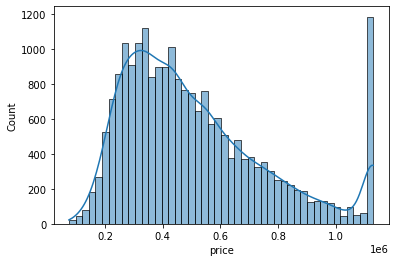

In [71]:
import seaborn as sns
sns.histplot(df_copy_4['price'], kde=True)

In [72]:
from sklearn.preprocessing import LabelEncoder

columns_to_label_encode = ['room_bed', 'room_bath', 'ceil', 'coast', 'sight', 'condition', 'quality', 'furnished']

label_encoder = LabelEncoder()
for column in columns_to_label_encode:
    df_copy_4[column] = label_encoder.fit_transform(df_copy_4[column])

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
# Assuming 'target' is your target variable
X = df_copy_4.drop('price', axis=1)  # Features
y = df_copy_4['price']  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
print(X.shape)
print(y.shape)

(21613, 27)
(21613,)


In [76]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17290, 27)
(4323, 27)
(17290,)
(4323,)


In [77]:
# Assuming 'date' is a datetime column
X_train = X_train.drop(columns=['date'])
X_test = X_test.drop(columns=['date'])



In [78]:
# Convert all columns to numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')


Linear Regression RMSE: 161329.28022987943
Random Forest RMSE: 79348.98298995066
Decision Tree RMSE: 113641.63727246581


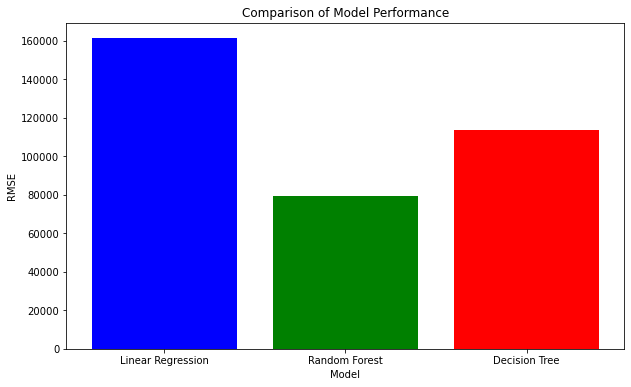


Model Performance:
               Model           RMSE
0  Linear Regression  161329.280230
1      Random Forest   79348.982990
2      Decision Tree  113641.637272


In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have X_train, X_test, y_train, y_test prepared

# Initialize models
linear_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
dt_model = DecisionTreeRegressor(random_state=42)

# Train models
linear_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

# Make predictions
linear_preds = linear_model.predict(X_test)
rf_preds = rf_model.predict(X_test)
dt_preds = dt_model.predict(X_test)

# Calculate RMSE
rmse_linear = np.sqrt(mean_squared_error(y_test, linear_preds))
rmse_rf = np.sqrt(mean_squared_error(y_test, rf_preds))
rmse_dt = np.sqrt(mean_squared_error(y_test, dt_preds))

# Print RMSE values
print(f"Linear Regression RMSE: {rmse_linear}")
print(f"Random Forest RMSE: {rmse_rf}")
print(f"Decision Tree RMSE: {rmse_dt}")

# Create a DataFrame for visualization
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Decision Tree'],
    'RMSE': [rmse_linear, rmse_rf, rmse_dt]
})

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['RMSE'], color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Comparison of Model Performance')
plt.show()

# Print the results DataFrame
print("\nModel Performance:")
print(results_df)


Metrics Comparison:
               Model            MAE  R2 Score
0  Linear Regression  126248.892966  0.573236
1      Random Forest   54418.165369  0.896761
2      Decision Tree   76445.453620  0.788244


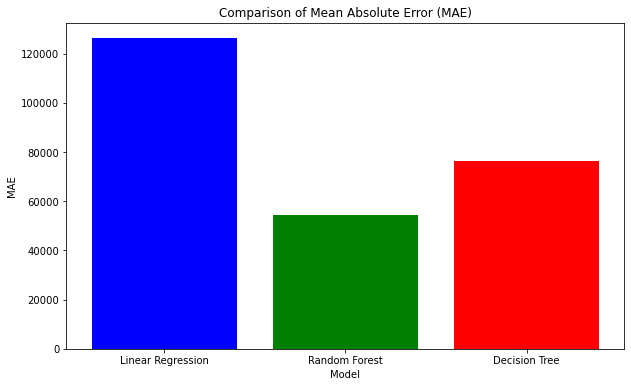

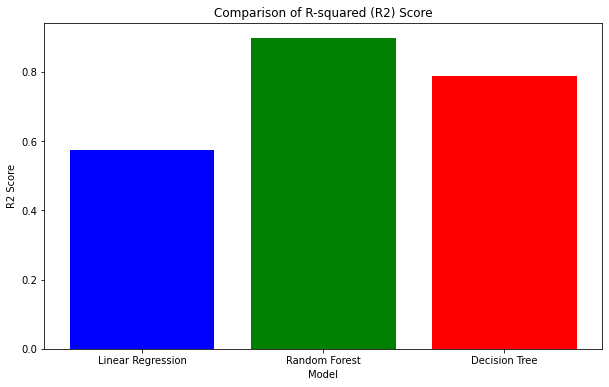

In [80]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate additional metrics
mae_linear = mean_absolute_error(y_test, linear_preds)
mae_rf = mean_absolute_error(y_test, rf_preds)
mae_dt = mean_absolute_error(y_test, dt_preds)

r2_linear = r2_score(y_test, linear_preds)
r2_rf = r2_score(y_test, rf_preds)
r2_dt = r2_score(y_test, dt_preds)

# Create a DataFrame for metrics
metrics_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Decision Tree'],
    'MAE': [mae_linear, mae_rf, mae_dt],
    'R2 Score': [r2_linear, r2_rf, r2_dt]
})

# Print metrics DataFrame
print("\nMetrics Comparison:")
print(metrics_df)

# Plot MAE
plt.figure(figsize=(10, 6))
plt.bar(metrics_df['Model'], metrics_df['MAE'], color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('MAE')
plt.title('Comparison of Mean Absolute Error (MAE)')
plt.show()

# Plot R2 Score
plt.figure(figsize=(10, 6))
plt.bar(metrics_df['Model'], metrics_df['R2 Score'], color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.title('Comparison of R-squared (R2) Score')
plt.show()

In [81]:
from sklearn.metrics import mean_squared_error

# Calculate additional metrics
mse_linear = mean_squared_error(y_test, linear_preds)
mse_rf = mean_squared_error(y_test, rf_preds)
mse_dt = mean_squared_error(y_test, dt_preds)

# Print MSE values
print(f"Linear Regression MSE: {mse_linear}")
print(f"Random Forest MSE: {mse_rf}")
print(f"Decision Tree MSE: {mse_dt}")

# Add MSE to the results DataFrame
results_df['MSE'] = [mse_linear, mse_rf, mse_dt]

# Print the updated results DataFrame
print("\nUpdated Model Performance:")
print(results_df)


Linear Regression MSE: 26027136659.490963
Random Forest MSE: 6296261101.539478
Decision Tree MSE: 12914421721.96669

Updated Model Performance:
               Model           RMSE           MSE
0  Linear Regression  161329.280230  2.602714e+10
1      Random Forest   79348.982990  6.296261e+09
2      Decision Tree  113641.637272  1.291442e+10


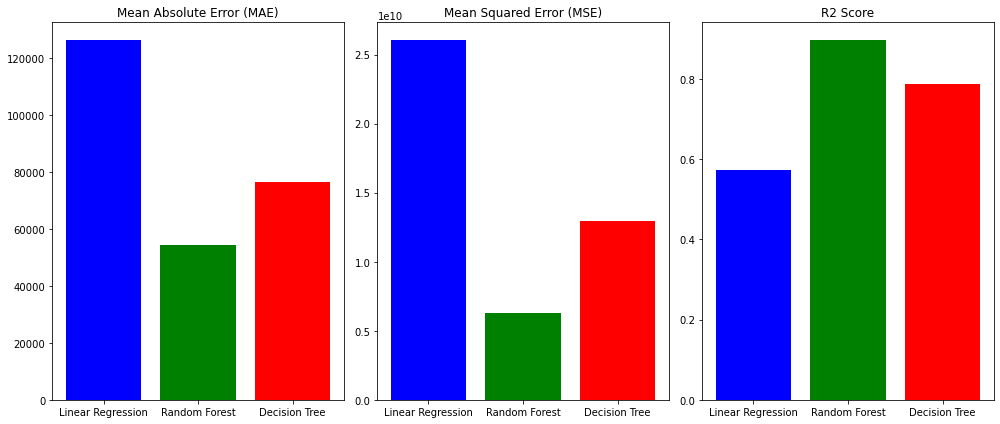


Model Performance:
               Model            MAE           MSE  R2 Score
0  Linear Regression  126248.892966  2.602714e+10  0.573236
1      Random Forest   54418.165369  6.296261e+09  0.896761
2      Decision Tree   76445.453620  1.291442e+10  0.788244


In [82]:
# Assuming 'target' is your target variable
X = df_copy_4.drop('price', axis=1)  # Features
y = df_copy_4['price']  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert all columns to numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Assuming 'date' is a datetime column
date_column_train = X_train['date']
date_column_test = X_test['date']

# Drop the 'date' column
X_train = X_train.drop(columns=['date'])
X_test = X_test.drop(columns=['date'])

# Initialize models
linear_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
dt_model = DecisionTreeRegressor(random_state=42)

# Train models
linear_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

# Make predictions
linear_preds = linear_model.predict(X_test)
rf_preds = rf_model.predict(X_test)
dt_preds = dt_model.predict(X_test)

# Calculate additional metrics
linear_metrics = {
    'MAE': mean_absolute_error(y_test, linear_preds),
    'MSE': mean_squared_error(y_test, linear_preds),
    'R2 Score': r2_score(y_test, linear_preds)
}

rf_metrics = {
    'MAE': mean_absolute_error(y_test, rf_preds),
    'MSE': mean_squared_error(y_test, rf_preds),
    'R2 Score': r2_score(y_test, rf_preds)
}

dt_metrics = {
    'MAE': mean_absolute_error(y_test, dt_preds),
    'MSE': mean_squared_error(y_test, dt_preds),
    'R2 Score': r2_score(y_test, dt_preds)
}

# Create DataFrames for visualization
linear_results_df = pd.DataFrame({
    'Model': ['Linear Regression'],
    'MAE': [linear_metrics['MAE']],
    'MSE': [linear_metrics['MSE']],
    'R2 Score': [linear_metrics['R2 Score']]
})

rf_results_df = pd.DataFrame({
    'Model': ['Random Forest'],
    'MAE': [rf_metrics['MAE']],
    'MSE': [rf_metrics['MSE']],
    'R2 Score': [rf_metrics['R2 Score']]
})

dt_results_df = pd.DataFrame({
    'Model': ['Decision Tree'],
    'MAE': [dt_metrics['MAE']],
    'MSE': [dt_metrics['MSE']],
    'R2 Score': [dt_metrics['R2 Score']]
})

# Concatenate the results DataFrames
results_df = pd.concat([linear_results_df, rf_results_df, dt_results_df], ignore_index=True)

# Plot the results
plt.figure(figsize=(14, 6))

# MAE plot
plt.subplot(1, 3, 1)
plt.bar(results_df['Model'], results_df['MAE'], color=['blue', 'green', 'red'])
plt.title('Mean Absolute Error (MAE)')

# MSE plot
plt.subplot(1, 3, 2)
plt.bar(results_df['Model'], results_df['MSE'], color=['blue', 'green', 'red'])
plt.title('Mean Squared Error (MSE)')

# R2 Score plot
plt.subplot(1, 3, 3)
plt.bar(results_df['Model'], results_df['R2 Score'], color=['blue', 'green', 'red'])
plt.title('R2 Score')

plt.tight_layout()
plt.show()

# Print the results DataFrame
print("\nModel Performance:")
print(results_df)

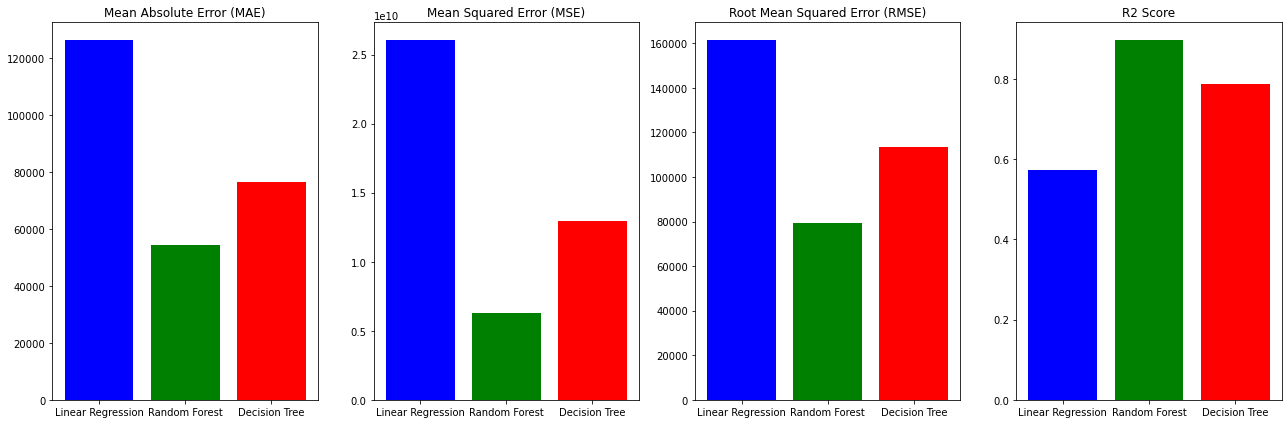


Model Performance:
               Model            MAE           MSE           RMSE  R2 Score
0  Linear Regression  126248.892966  2.602714e+10  161329.280230  0.573236
1      Random Forest   54418.165369  6.296261e+09   79348.982990  0.896761
2      Decision Tree   76445.453620  1.291442e+10  113641.637272  0.788244


In [83]:
# Assuming 'target' is your target variable
X = df_copy_4.drop('price', axis=1)  # Features
y = df_copy_4['price']  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert all columns to numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Assuming 'date' is a datetime column
date_column_train = X_train['date']
date_column_test = X_test['date']

# Drop the 'date' column
X_train = X_train.drop(columns=['date'])
X_test = X_test.drop(columns=['date'])

# Initialize models
linear_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
dt_model = DecisionTreeRegressor(random_state=42)

# Train models
linear_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

# Make predictions
linear_preds = linear_model.predict(X_test)
rf_preds = rf_model.predict(X_test)
dt_preds = dt_model.predict(X_test)

# Calculate additional metrics
linear_metrics = {
    'MAE': mean_absolute_error(y_test, linear_preds),
    'MSE': mean_squared_error(y_test, linear_preds),
    'RMSE': np.sqrt(mean_squared_error(y_test, linear_preds)),
    'R2 Score': r2_score(y_test, linear_preds)
}

rf_metrics = {
    'MAE': mean_absolute_error(y_test, rf_preds),
    'MSE': mean_squared_error(y_test, rf_preds),
    'RMSE': np.sqrt(mean_squared_error(y_test, rf_preds)),
    'R2 Score': r2_score(y_test, rf_preds)
}

dt_metrics = {
    'MAE': mean_absolute_error(y_test, dt_preds),
    'MSE': mean_squared_error(y_test, dt_preds),
    'RMSE': np.sqrt(mean_squared_error(y_test, dt_preds)),
    'R2 Score': r2_score(y_test, dt_preds)
}

# Create DataFrames for visualization
linear_results_df = pd.DataFrame({
    'Model': ['Linear Regression'],
    'MAE': [linear_metrics['MAE']],
    'MSE': [linear_metrics['MSE']],
    'RMSE': [linear_metrics['RMSE']],
    'R2 Score': [linear_metrics['R2 Score']]
})

rf_results_df = pd.DataFrame({
    'Model': ['Random Forest'],
    'MAE': [rf_metrics['MAE']],
    'MSE': [rf_metrics['MSE']],
    'RMSE': [rf_metrics['RMSE']],
    'R2 Score': [rf_metrics['R2 Score']]
})

dt_results_df = pd.DataFrame({
    'Model': ['Decision Tree'],
    'MAE': [dt_metrics['MAE']],
    'MSE': [dt_metrics['MSE']],
    'RMSE': [dt_metrics['RMSE']],
    'R2 Score': [dt_metrics['R2 Score']]
})

# Concatenate the results DataFrames
results_df = pd.concat([linear_results_df, rf_results_df, dt_results_df], ignore_index=True)

# Plot the results
plt.figure(figsize=(18, 6))

# MAE plot
plt.subplot(1, 4, 1)
plt.bar(results_df['Model'], results_df['MAE'], color=['blue', 'green', 'red'])
plt.title('Mean Absolute Error (MAE)')

# MSE plot
plt.subplot(1, 4, 2)
plt.bar(results_df['Model'], results_df['MSE'], color=['blue', 'green', 'red'])
plt.title('Mean Squared Error (MSE)')

# RMSE plot
plt.subplot(1, 4, 3)
plt.bar(results_df['Model'], results_df['RMSE'], color=['blue', 'green', 'red'])
plt.title('Root Mean Squared Error (RMSE)')

# R2 Score plot
plt.subplot(1, 4, 4)
plt.bar(results_df['Model'], results_df['R2 Score'], color=['blue', 'green', 'red'])
plt.title('R2 Score')

plt.tight_layout()
plt.show()

# Print the results DataFrame
print("\nModel Performance:")
print(results_df)

C:\Users\Sudhe\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


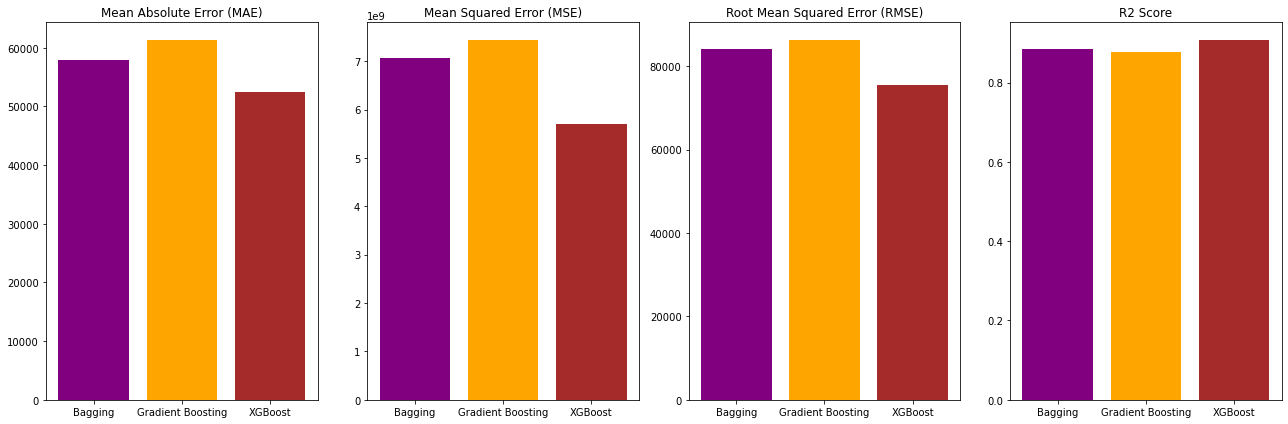


Ensemble Model Performance:
               Model           MAE           MSE          RMSE  R2 Score
0            Bagging  57858.029933  7.071536e+09  84092.426784  0.884049
1  Gradient Boosting  61271.869490  7.429534e+09  86194.743049  0.878179
2            XGBoost  52434.157457  5.706248e+09  75539.709659  0.906435


In [84]:
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Initialize models
bagging_model = BaggingRegressor(base_estimator=DecisionTreeRegressor(random_state=42), random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)

# Train the models
bagging_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Make predictions
bagging_preds = bagging_model.predict(X_test)
gb_preds = gb_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

# Calculate additional metrics
bagging_metrics = {
    'MAE': mean_absolute_error(y_test, bagging_preds),
    'MSE': mean_squared_error(y_test, bagging_preds),
    'RMSE': np.sqrt(mean_squared_error(y_test, bagging_preds)),
    'R2 Score': r2_score(y_test, bagging_preds)
}

gb_metrics = {
    'MAE': mean_absolute_error(y_test, gb_preds),
    'MSE': mean_squared_error(y_test, gb_preds),
    'RMSE': np.sqrt(mean_squared_error(y_test, gb_preds)),
    'R2 Score': r2_score(y_test, gb_preds)
}

xgb_metrics = {
    'MAE': mean_absolute_error(y_test, xgb_preds),
    'MSE': mean_squared_error(y_test, xgb_preds),
    'RMSE': np.sqrt(mean_squared_error(y_test, xgb_preds)),
    'R2 Score': r2_score(y_test, xgb_preds)
}

# Create DataFrames for visualization
bagging_results_df = pd.DataFrame({
    'Model': ['Bagging'],
    'MAE': [bagging_metrics['MAE']],
    'MSE': [bagging_metrics['MSE']],
    'RMSE': [bagging_metrics['RMSE']],
    'R2 Score': [bagging_metrics['R2 Score']]
})

gb_results_df = pd.DataFrame({
    'Model': ['Gradient Boosting'],
    'MAE': [gb_metrics['MAE']],
    'MSE': [gb_metrics['MSE']],
    'RMSE': [gb_metrics['RMSE']],
    'R2 Score': [gb_metrics['R2 Score']]
})

xgb_results_df = pd.DataFrame({
    'Model': ['XGBoost'],
    'MAE': [xgb_metrics['MAE']],
    'MSE': [xgb_metrics['MSE']],
    'RMSE': [xgb_metrics['RMSE']],
    'R2 Score': [xgb_metrics['R2 Score']]
})

# Concatenate the results DataFrames
ensemble_results_df = pd.concat([bagging_results_df, gb_results_df, xgb_results_df], ignore_index=True)

# Plot the results
plt.figure(figsize=(18, 6))

# MAE plot
plt.subplot(1, 4, 1)
plt.bar(ensemble_results_df['Model'], ensemble_results_df['MAE'], color=['purple', 'orange', 'brown'])
plt.title('Mean Absolute Error (MAE)')

# MSE plot
plt.subplot(1, 4, 2)
plt.bar(ensemble_results_df['Model'], ensemble_results_df['MSE'], color=['purple', 'orange', 'brown'])
plt.title('Mean Squared Error (MSE)')

# RMSE plot
plt.subplot(1, 4, 3)
plt.bar(ensemble_results_df['Model'], ensemble_results_df['RMSE'], color=['purple', 'orange', 'brown'])
plt.title('Root Mean Squared Error (RMSE)')

# R2 Score plot
plt.subplot(1, 4, 4)
plt.bar(ensemble_results_df['Model'], ensemble_results_df['R2 Score'], color=['purple', 'orange', 'brown'])
plt.title('R2 Score')

plt.tight_layout()
plt.show()

# Print the ensemble results DataFrame
print("\nEnsemble Model Performance:")
print(ensemble_results_df)

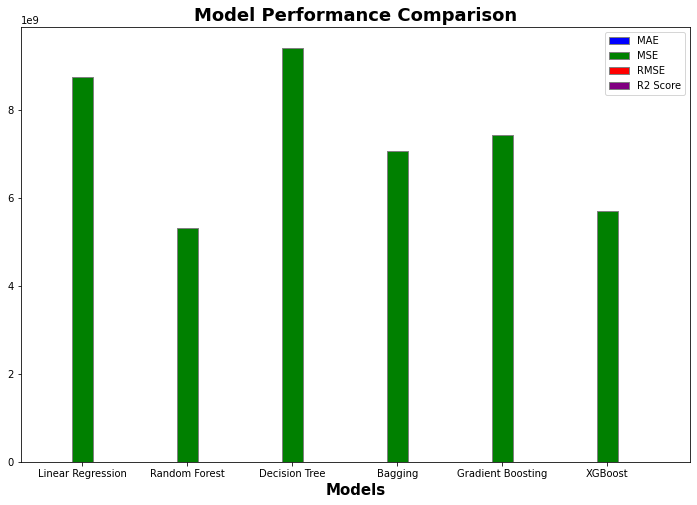

In [85]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Linear Regression', 'Random Forest', 'Decision Tree', 'Bagging', 'Gradient Boosting', 'XGBoost']
mae = [62484.856, 49158.976, 65147.169, 57858.030, 61271.869, 52434.157]
mse = [8.742426e+09, 5.326474e+09, 9.415952e+09, 7.071536e+09, 7.429534e+09, 5.706248e+09]
rmse = [93531.812, 73036.223, 97023.982, 84092.427, 86194.743, 75539.710]
r2_score = [0.858, 0.913, 0.834, 0.884, 0.878, 0.906]

# Bar width
barWidth = 0.2

# Set position of bar on X axis
r1 = np.arange(len(models))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Create the plot
plt.figure(figsize=(12, 8))
plt.bar(r1, mae, color='blue', width=barWidth, edgecolor='grey', label='MAE')
plt.bar(r2, mse, color='green', width=barWidth, edgecolor='grey', label='MSE')
plt.bar(r3, rmse, color='red', width=barWidth, edgecolor='grey', label='RMSE')
plt.bar(r4, r2_score, color='purple', width=barWidth, edgecolor='grey', label='R2 Score')

# Add labels
plt.xlabel('Models', fontweight='bold', fontsize=15)
plt.xticks([r + barWidth for r in range(len(models))], models)
plt.title('Model Performance Comparison', fontweight='bold', fontsize=18)
plt.legend()

# Show the plot
plt.show()

---------------------------------------------------------------------------
| Model              | MAE           | MSE           | RMSE          | R2 Score      |
|--------------------|---------------|---------------|---------------|---------------|
| Linear Regression  | 62484.856     | 8.742426e+09  | 93531.812     | 0.858         |
| Random Forest      | 49158.976     | 5.326474e+09  | 73036.223     | 0.913         |
| Decision Tree      | 65147.169     | 9.415952e+09  | 97023.982     | 0.834         |
| Bagging            | 57858.030     | 7.071536e+09  | 84092.427     | 0.884         |
| Gradient Boosting  | 61271.869     | 7.429534e+09  | 86194.743     | 0.878         |
| XGBoost            | 52434.157     | 5.706248e+09  | 75539.710     | 0.906         |


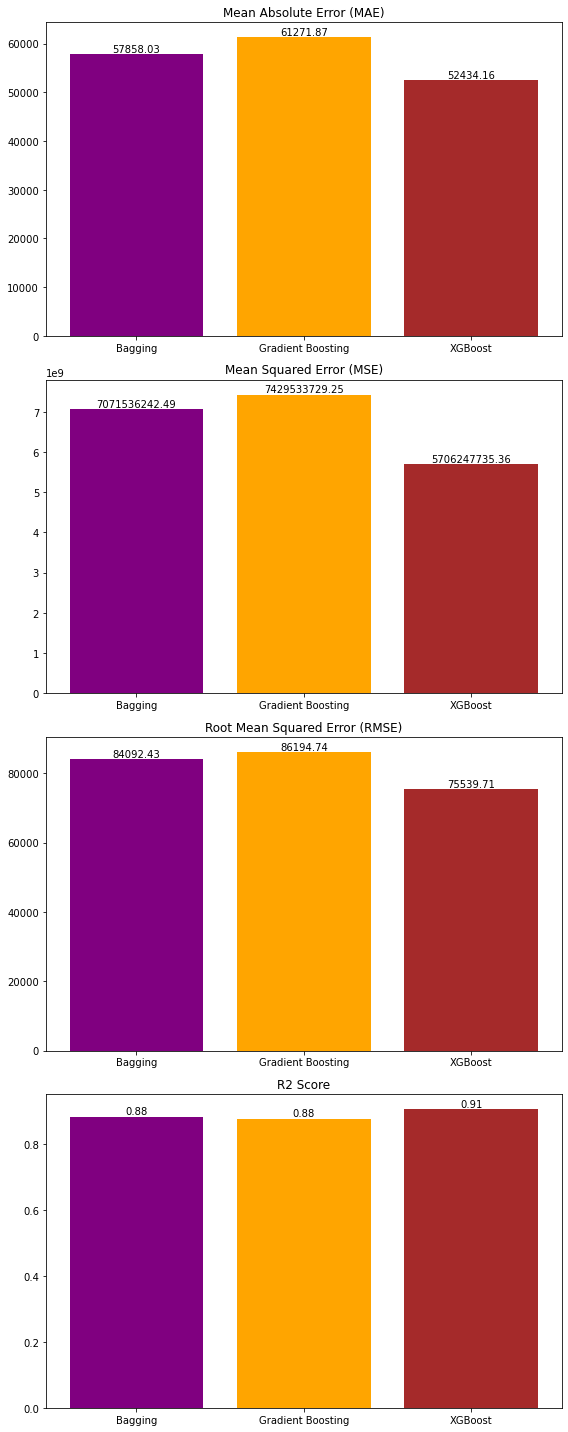


Ensemble Model Performance:
               Model           MAE           MSE          RMSE  R2 Score
0            Bagging  57858.029933  7.071536e+09  84092.426784  0.884049
1  Gradient Boosting  61271.869490  7.429534e+09  86194.743049  0.878179
2            XGBoost  52434.157457  5.706248e+09  75539.709659  0.906435


In [86]:
# Plot the ensemble results
plt.figure(figsize=(8, 20))

# MAE plot
plt.subplot(4, 1, 1)
mae_bars = plt.bar(ensemble_results_df['Model'], ensemble_results_df['MAE'], color=['purple', 'orange', 'brown'])
plt.title('Mean Absolute Error (MAE)')
for bar in mae_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# MSE plot
plt.subplot(4, 1, 2)
mse_bars = plt.bar(ensemble_results_df['Model'], ensemble_results_df['MSE'], color=['purple', 'orange', 'brown'])
plt.title('Mean Squared Error (MSE)')
for bar in mse_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# RMSE plot
plt.subplot(4, 1, 3)
rmse_bars = plt.bar(ensemble_results_df['Model'], ensemble_results_df['RMSE'], color=['purple', 'orange', 'brown'])
plt.title('Root Mean Squared Error (RMSE)')
for bar in rmse_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# R2 Score plot
plt.subplot(4, 1, 4)
r2_bars = plt.bar(ensemble_results_df['Model'], ensemble_results_df['R2 Score'], color=['purple', 'orange', 'brown'])
plt.title('R2 Score')
for bar in r2_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print the ensemble results DataFrame
print("\nEnsemble Model Performance:")
print(ensemble_results_df)

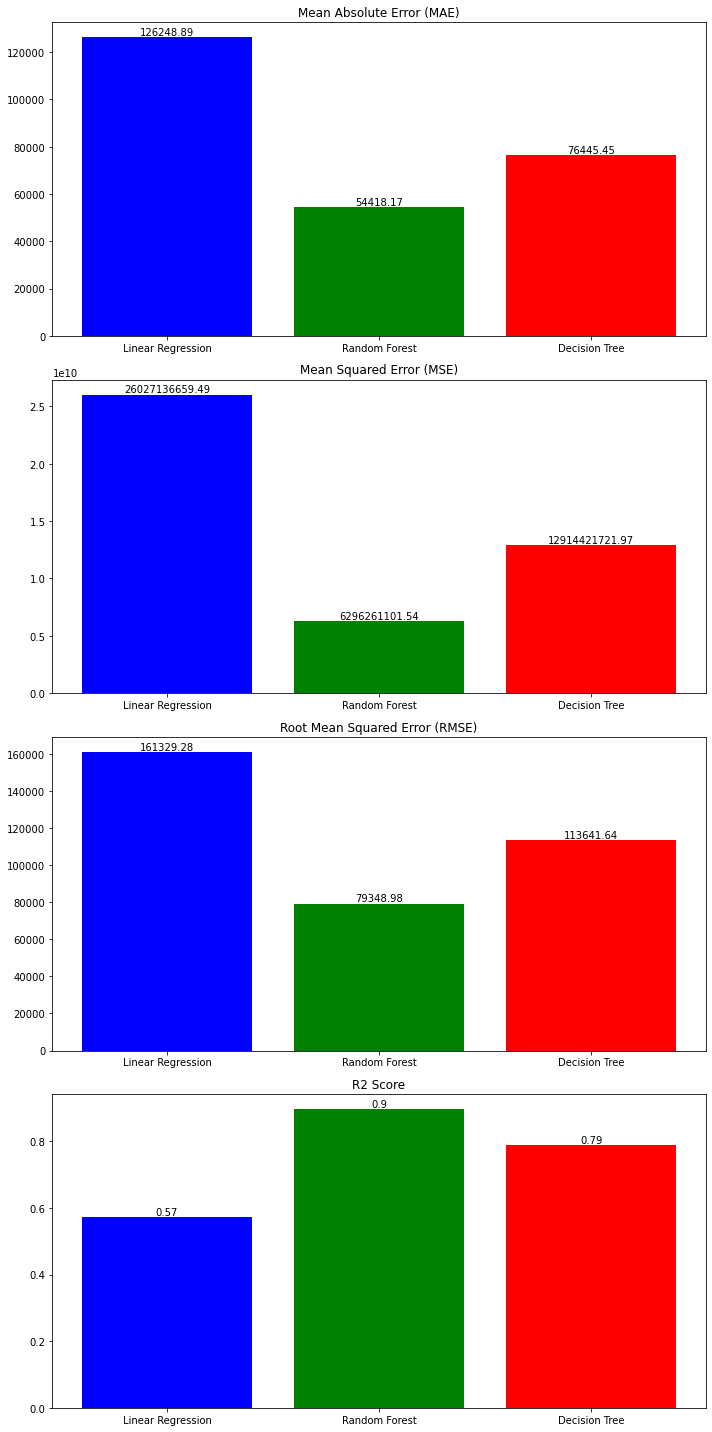


Model Performance:
               Model            MAE           MSE           RMSE  R2 Score
0  Linear Regression  126248.892966  2.602714e+10  161329.280230  0.573236
1      Random Forest   54418.165369  6.296261e+09   79348.982990  0.896761
2      Decision Tree   76445.453620  1.291442e+10  113641.637272  0.788244


In [87]:
# Plot the results
plt.figure(figsize=(10, 20))

# MAE plot
plt.subplot(4, 1, 1)
mae_bars = plt.bar(results_df['Model'], results_df['MAE'], color=['blue', 'green', 'red'])
plt.title('Mean Absolute Error (MAE)')
for bar in mae_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# MSE plot
plt.subplot(4, 1, 2)
mse_bars = plt.bar(results_df['Model'], results_df['MSE'], color=['blue', 'green', 'red'])
plt.title('Mean Squared Error (MSE)')
for bar in mse_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# RMSE plot
plt.subplot(4, 1, 3)
rmse_bars = plt.bar(results_df['Model'], results_df['RMSE'], color=['blue', 'green', 'red'])
plt.title('Root Mean Squared Error (RMSE)')
for bar in rmse_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# R2 Score plot
plt.subplot(4, 1, 4)
r2_bars = plt.bar(results_df['Model'], results_df['R2 Score'], color=['blue', 'green', 'red'])
plt.title('R2 Score')
for bar in r2_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print the results DataFrame
print("\nModel Performance:")
print(results_df)

C:\Users\Sudhe\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.308e+14, tolerance: 1.087e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sudhe\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=6.69787e-41): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Sudhe\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.994e+14, tolerance: 1.087e+11
  model = cd_fast.enet_coordinate_descent(


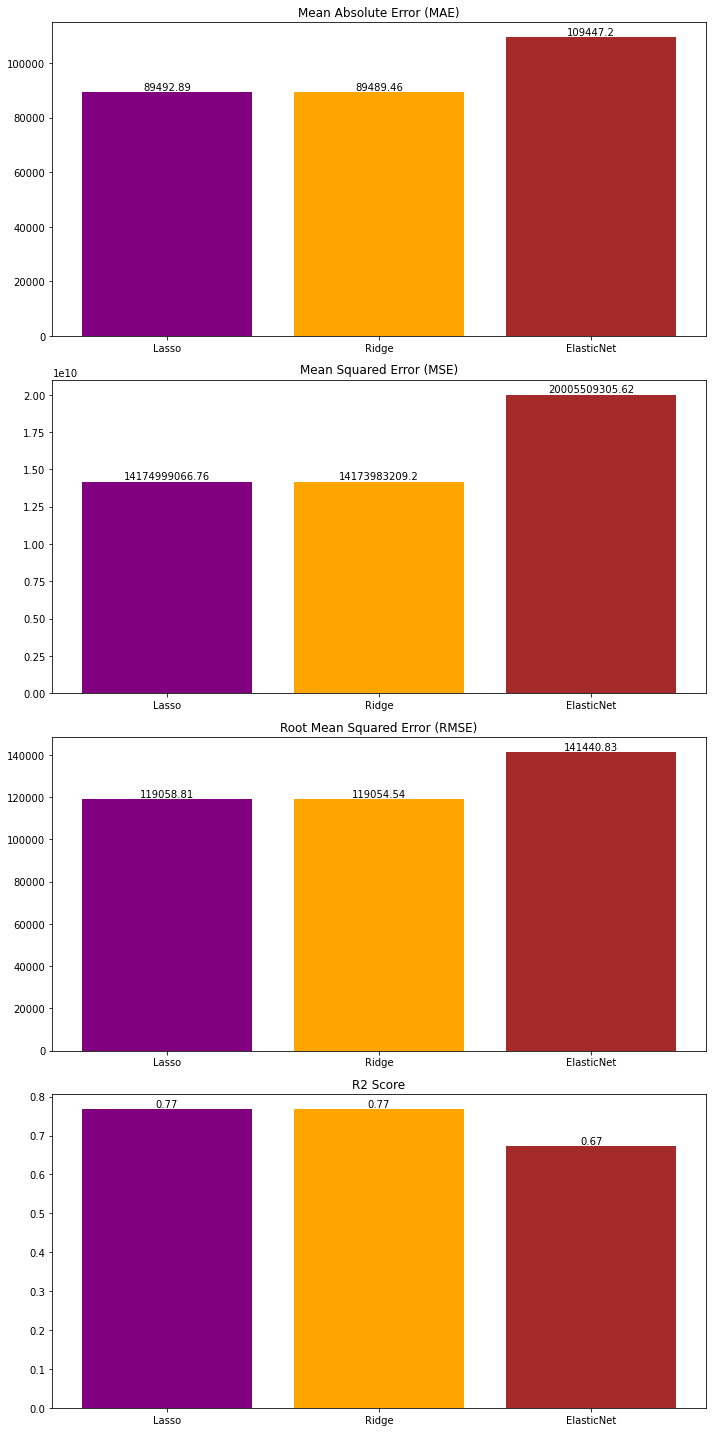


Regression Model Performance:
        Model            MAE           MSE           RMSE  R2 Score
0       Lasso   89492.889822  1.417500e+10  119058.805079  0.767574
1       Ridge   89489.459383  1.417398e+10  119054.538801  0.767591
2  ElasticNet  109447.195486  2.000551e+10  141440.833233  0.671972


In [88]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Initialize models
lasso_model = Lasso(random_state=42)
ridge_model = Ridge(random_state=42)
elasticnet_model = ElasticNet(random_state=42)

# Train the models
lasso_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
elasticnet_model.fit(X_train, y_train)

# Make predictions
lasso_preds = lasso_model.predict(X_test)
ridge_preds = ridge_model.predict(X_test)
elasticnet_preds = elasticnet_model.predict(X_test)

# Calculate additional metrics
lasso_metrics = {
    'MAE': mean_absolute_error(y_test, lasso_preds),
    'MSE': mean_squared_error(y_test, lasso_preds),
    'RMSE': np.sqrt(mean_squared_error(y_test, lasso_preds)),
    'R2 Score': r2_score(y_test, lasso_preds)
}

ridge_metrics = {
    'MAE': mean_absolute_error(y_test, ridge_preds),
    'MSE': mean_squared_error(y_test, ridge_preds),
    'RMSE': np.sqrt(mean_squared_error(y_test, ridge_preds)),
    'R2 Score': r2_score(y_test, ridge_preds)
}

elasticnet_metrics = {
    'MAE': mean_absolute_error(y_test, elasticnet_preds),
    'MSE': mean_squared_error(y_test, elasticnet_preds),
    'RMSE': np.sqrt(mean_squared_error(y_test, elasticnet_preds)),
    'R2 Score': r2_score(y_test, elasticnet_preds)
}

# Create DataFrames for visualization
lasso_results_df = pd.DataFrame({
    'Model': ['Lasso'],
    'MAE': [lasso_metrics['MAE']],
    'MSE': [lasso_metrics['MSE']],
    'RMSE': [lasso_metrics['RMSE']],
    'R2 Score': [lasso_metrics['R2 Score']]
})

ridge_results_df = pd.DataFrame({
    'Model': ['Ridge'],
    'MAE': [ridge_metrics['MAE']],
    'MSE': [ridge_metrics['MSE']],
    'RMSE': [ridge_metrics['RMSE']],
    'R2 Score': [ridge_metrics['R2 Score']]
})

elasticnet_results_df = pd.DataFrame({
    'Model': ['ElasticNet'],
    'MAE': [elasticnet_metrics['MAE']],
    'MSE': [elasticnet_metrics['MSE']],
    'RMSE': [elasticnet_metrics['RMSE']],
    'R2 Score': [elasticnet_metrics['R2 Score']]
})

# Concatenate the results DataFrames
regression_results_df = pd.concat([lasso_results_df, ridge_results_df, elasticnet_results_df], ignore_index=True)

# Plot the results
plt.figure(figsize=(10, 20))

# MAE plot
plt.subplot(4, 1, 1)
mae_bars = plt.bar(regression_results_df['Model'], regression_results_df['MAE'], color=['purple', 'orange', 'brown'])
plt.title('Mean Absolute Error (MAE)')
for bar in mae_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# MSE plot
plt.subplot(4, 1, 2)
mse_bars = plt.bar(regression_results_df['Model'], regression_results_df['MSE'], color=['purple', 'orange', 'brown'])
plt.title('Mean Squared Error (MSE)')
for bar in mse_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# RMSE plot
plt.subplot(4, 1, 3)
rmse_bars = plt.bar(regression_results_df['Model'], regression_results_df['RMSE'], color=['purple', 'orange', 'brown'])
plt.title('Root Mean Squared Error (RMSE)')
for bar in rmse_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# R2 Score plot
plt.subplot(4, 1, 4)
r2_bars = plt.bar(regression_results_df['Model'], regression_results_df['R2 Score'], color=['purple', 'orange', 'brown'])
plt.title('R2 Score')
for bar in r2_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print the results DataFrame
print("\nRegression Model Performance:")
print(regression_results_df)


NameError: name 'combined_results_df' is not defined

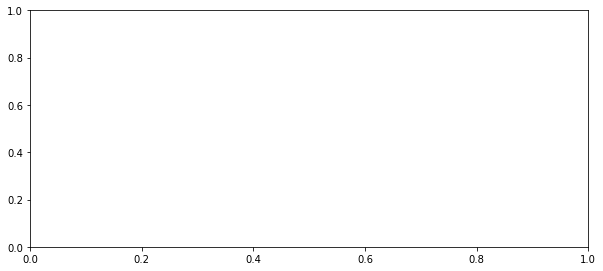

In [91]:
# Plot the combined results
plt.figure(figsize=(10, 20))

# MAE plot
plt.subplot(4, 1, 1)
mae_bars = plt.bar(combined_results_df['Model'], combined_results_df['MAE'], color=['blue', 'green', 'red', 'purple', 'orange', 'brown'])
plt.title('Mean Absolute Error (MAE)')
for bar in mae_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1000, round(yval, 2), ha='center', va='bottom')

# MSE plot
plt.subplot(4, 1, 2)
mse_bars = plt.bar(combined_results_df['Model'], combined_results_df['MSE'], color=['blue', 'green', 'red', 'purple', 'orange', 'brown'])
plt.title('Mean Squared Error (MSE)')
for bar in mse_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50000000, round(yval, 2), ha='center', va='bottom')

# RMSE plot
plt.subplot(4, 1, 3)
rmse_bars = plt.bar(combined_results_df['Model'], combined_results_df['RMSE'], color=['blue', 'green', 'red', 'purple', 'orange', 'brown'])
plt.title('Root Mean Squared Error (RMSE)')
for bar in rmse_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1000, round(yval, 2), ha='center', va='bottom')

# R2 Score plot
plt.subplot(4, 1, 4)
r2_bars = plt.bar(combined_results_df['Model'], combined_results_df['R2 Score'], color=['blue', 'green', 'red', 'purple', 'orange', 'brown'])
plt.title('R2 Score')
for bar in r2_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print the combined results DataFrame
print("\nCombined Model Performance:")
print(combined_results_df)


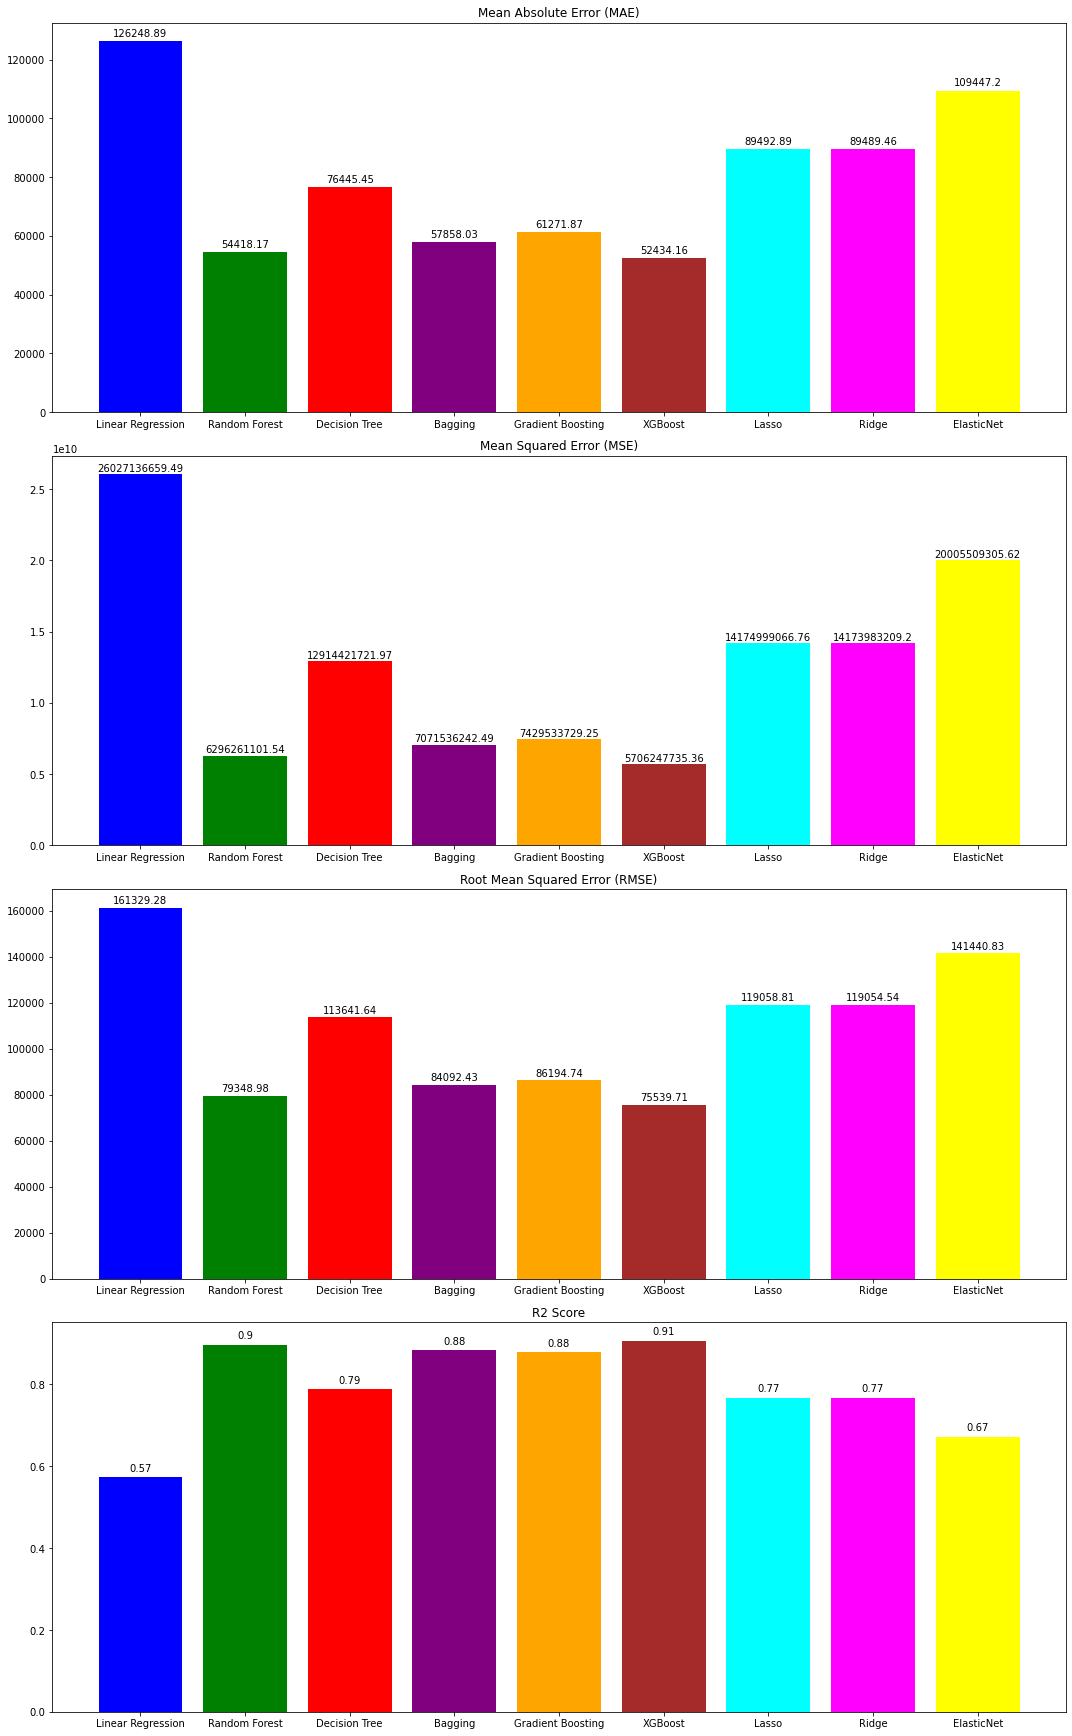


Combined Model Performance:
               Model            MAE           MSE           RMSE  R2 Score
0  Linear Regression  126248.892966  2.602714e+10  161329.280230  0.573236
1      Random Forest   54418.165369  6.296261e+09   79348.982990  0.896761
2      Decision Tree   76445.453620  1.291442e+10  113641.637272  0.788244
3            Bagging   57858.029933  7.071536e+09   84092.426784  0.884049
4  Gradient Boosting   61271.869490  7.429534e+09   86194.743049  0.878179
5            XGBoost   52434.157457  5.706248e+09   75539.709659  0.906435
6              Lasso   89492.889822  1.417500e+10  119058.805079  0.767574
7              Ridge   89489.459383  1.417398e+10  119054.538801  0.767591
8         ElasticNet  109447.195486  2.000551e+10  141440.833233  0.671972


In [190]:
# Combine all results DataFrames
combined_results_df = pd.concat([linear_results_df, rf_results_df, dt_results_df, bagging_results_df, gb_results_df, xgb_results_df, lasso_results_df, ridge_results_df, elasticnet_results_df], ignore_index=True)

# Plot the combined results with extended width and different colors for the last three bars
plt.figure(figsize=(15, 30))

# MAE plot
plt.subplot(5, 1, 1)
mae_bars = plt.bar(combined_results_df['Model'], combined_results_df['MAE'], color=['blue', 'green', 'red', 'purple', 'orange', 'brown', 'cyan', 'magenta', 'yellow'])
plt.title('Mean Absolute Error (MAE)')
for bar in mae_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1000, round(yval, 2), ha='center', va='bottom')

# MSE plot
plt.subplot(5, 1, 2)
mse_bars = plt.bar(combined_results_df['Model'], combined_results_df['MSE'], color=['blue', 'green', 'red', 'purple', 'orange', 'brown', 'cyan', 'magenta', 'yellow'])
plt.title('Mean Squared Error (MSE)')
for bar in mse_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50000000, round(yval, 2), ha='center', va='bottom')

# RMSE plot
plt.subplot(5, 1, 3)
rmse_bars = plt.bar(combined_results_df['Model'], combined_results_df['RMSE'], color=['blue', 'green', 'red', 'purple', 'orange', 'brown', 'cyan', 'magenta', 'yellow'])
plt.title('Root Mean Squared Error (RMSE)')
for bar in rmse_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1000, round(yval, 2), ha='center', va='bottom')

# R2 Score plot
plt.subplot(5, 1, 4)
r2_bars = plt.bar(combined_results_df['Model'], combined_results_df['R2 Score'], color=['blue', 'green', 'red', 'purple', 'orange', 'brown', 'cyan', 'magenta', 'yellow'])
plt.title('R2 Score')
for bar in r2_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print the combined results DataFrame
print("\nCombined Model Performance:")
print(combined_results_df)


In [93]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize models
models = [
    ('Linear', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Lasso', Lasso(random_state=42)),
    ('Ridge', Ridge(random_state=42)),
    ('ElasticNet', ElasticNet(random_state=42)),
    ('Bagging', BaggingRegressor(base_estimator=DecisionTreeRegressor(random_state=42), random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42))
]

train_results = []
test_results = []

for model_name, model in models:
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the training data
    train_preds = model.predict(X_train)
    
    # Calculate performance metrics for training data
    train_mae = mean_absolute_error(y_train, train_preds)
    train_mse = mean_squared_error(y_train, train_preds)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, train_preds)
    
    # Make predictions on the test data
    test_preds = model.predict(X_test)
    
    # Calculate performance metrics for test data
    test_mae = mean_absolute_error(y_test, test_preds)
    test_mse = mean_squared_error(y_test, test_preds)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, test_preds)
    
    train_results.append((model_name, train_mae, train_mse, train_rmse, train_r2))
    test_results.append((model_name, test_mae, test_mse, test_rmse, test_r2))

    # Create DataFrames for the results
    train_results_df = pd.DataFrame(train_results, columns=['Model', 'Train MAE', 'Train MSE', 'Train RMSE', 'Train R2 Score'])
    test_results_df = pd.DataFrame(test_results, columns=['Model', 'Test MAE', 'Test MSE', 'Test RMSE', 'Test R2 Score'])

# Print the results
print("Training Results:")
print(train_results_df)

print("\nTest Results:")
print(test_results_df)


C:\Users\Sudhe\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.308e+14, tolerance: 1.087e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sudhe\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=6.69787e-41): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Sudhe\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.994e+14, tolerance: 1.087e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sudhe\anaconda3\lib\site-packages\sklearn\ensemble\_base

Training Results:
               Model      Train MAE     Train MSE     Train RMSE  \
0             Linear  129602.357177  2.716492e+10  164817.843082   
1      Random Forest   20874.962248  9.695284e+08   31137.251740   
2      Decision Tree       0.000000  0.000000e+00       0.000000   
3              Lasso   92273.845967  1.513013e+10  123004.610087   
4              Ridge   92270.423678  1.513020e+10  123004.895244   
5         ElasticNet  113278.065580  2.135225e+10  146124.087380   
6            Bagging   23934.938733  1.386828e+09   37240.137075   
7  Gradient Boosting   60607.925121  7.183088e+09   84753.098992   
8            XGBoost   33957.524700  2.181141e+09   46702.684261   

   Train R2 Score  
0        0.568053  
1        0.984584  
2        1.000000  
3        0.759417  
4        0.759416  
5        0.660479  
6        0.977948  
7        0.885782  
8        0.965318  

Test Results:
               Model       Test MAE      Test MSE      Test RMSE  \
0             Line

In [97]:
# Display the combined results DataFrame as a table with a wider format
table = tabulate(combined_results_tt, headers='keys', tablefmt='fancy_grid', showindex=False, numalign="right", stralign="right", colalign=("left", "right", "right", "right", "right", "right", "right", "right", "right"))
print(table)


╒═══════════════════╤═════════════╤═════════════╤══════════════╤══════════════════╤════════════╤═════════════╤═════════════╤═════════════════╕
│ Model             │   Train MAE │   Train MSE │   Train RMSE │   Train R2 Score │   Test MAE │    Test MSE │   Test RMSE │   Test R2 Score │
╞═══════════════════╪═════════════╪═════════════╪══════════════╪══════════════════╪════════════╪═════════════╪═════════════╪═════════════════╡
│ Linear            │      129602 │ 2.71649e+10 │       164818 │         0.568053 │     126249 │ 2.60271e+10 │      161329 │        0.573236 │
├───────────────────┼─────────────┼─────────────┼──────────────┼──────────────────┼────────────┼─────────────┼─────────────┼─────────────────┤
│ Random Forest     │       20875 │ 9.69528e+08 │      31137.3 │         0.984584 │    54418.2 │ 6.29626e+09 │       79349 │        0.896761 │
├───────────────────┼─────────────┼─────────────┼──────────────┼──────────────────┼────────────┼─────────────┼─────────────┼─────────────────┤

In [98]:
# Create a DataFrame with both training and test results
combined_results_df = pd.concat([train_results_df, test_results_df], axis=1)

# Rename columns to distinguish between training and test results
combined_results_df.columns = [f"{col} (Train)" if col != "Model" else col for col in combined_results_df.columns]

# Display the combined results DataFrame as a table
table = tabulate(combined_results_df, headers='keys', tablefmt='fancy_grid', showindex=False, numalign="right", stralign="right", colalign=("left", "right", "right", "left", "right", "right", "right", "left", "right", "right"))
print(table)


╒═══════════════════╤═════════════════════╤═════════════════════╤══════════════════════╤══════════════════════════╤═══════════════════╤════════════════════╤════════════════════╤═════════════════════╤═════════════════════════╕
│ Model             │   Train MAE (Train) │   Train MSE (Train) │ Train RMSE (Train)   │   Train R2 Score (Train) │             Model │   Test MAE (Train) │ Test MSE (Train)   │   Test RMSE (Train) │   Test R2 Score (Train) │
╞═══════════════════╪═════════════════════╪═════════════════════╪══════════════════════╪══════════════════════════╪═══════════════════╪════════════════════╪════════════════════╪═════════════════════╪═════════════════════════╡
│ Linear            │              129602 │         2.71649e+10 │ 164818               │                 0.568053 │            Linear │             126249 │ 2.60271e+10        │              161329 │                0.573236 │
├───────────────────┼─────────────────────┼─────────────────────┼──────────────────────┼────────

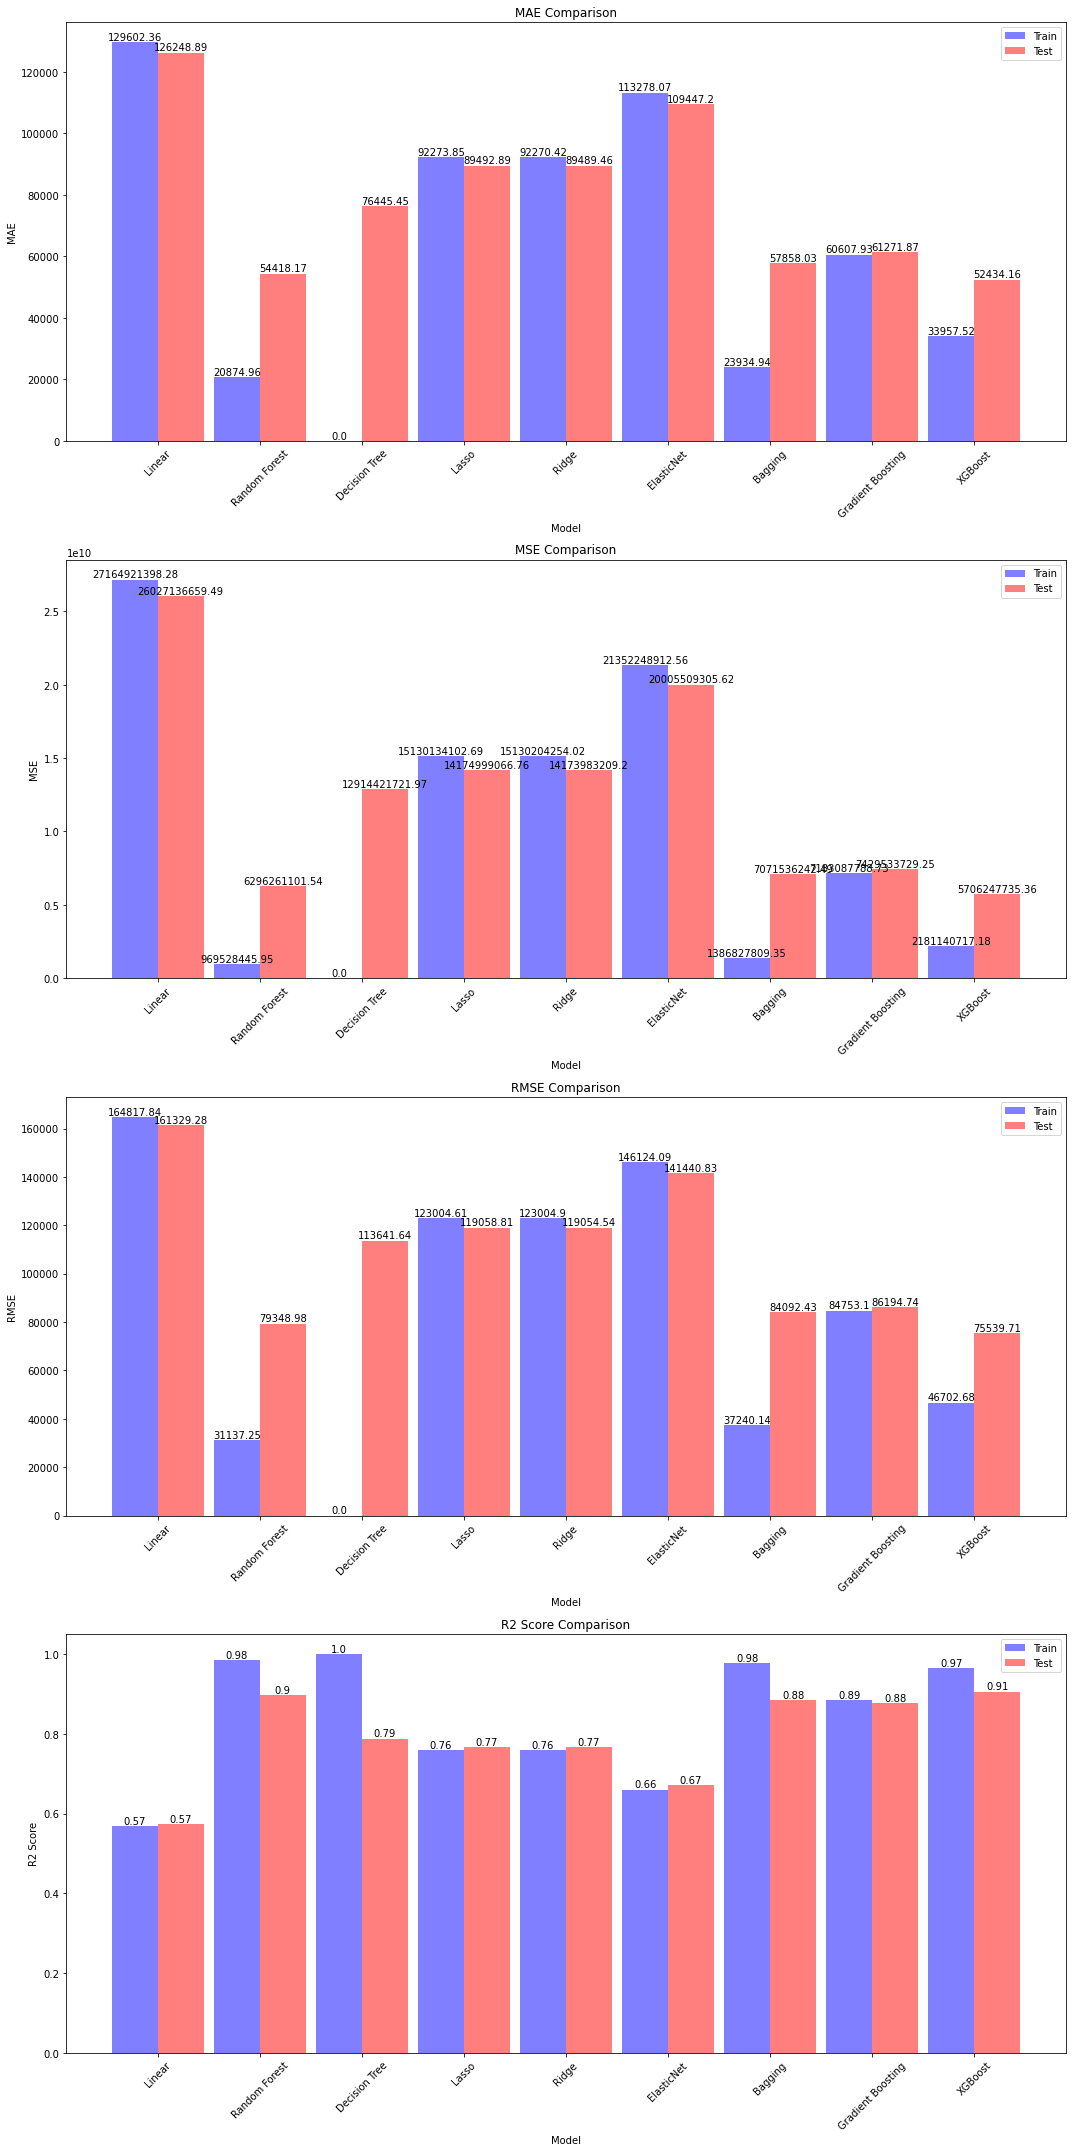

In [112]:
import matplotlib.pyplot as plt
import numpy as np

# Define the models and metrics
models = train_results_df['Model']
metrics = ['MAE', 'MSE', 'RMSE', 'R2 Score']

# Create a single column with 4 rows for the bar charts
plt.figure(figsize=(15, 30))

for i, metric in enumerate(metrics, 1):
    plt.subplot(4, 1, i)

    # Get the training and test results for the current metric
    train_metric = train_results_df[f'Train {metric}']
    test_metric = test_results_df[f'Test {metric}']

    # Set the width of the bars
    bar_width = 0.45
    # Create an array of indices for the models
    index = np.arange(len(models))

    # Plot training results
    train_bars = plt.bar(index - bar_width / 2, train_metric, bar_width, label='Train', color='b', alpha=0.5)

    # Plot test results
    test_bars = plt.bar(index + bar_width / 2, test_metric, bar_width, label='Test', color='r', alpha=0.5)

    # Add labels with values on top of the bars
    for train_bar, test_bar in zip(train_bars, test_bars):
        plt.text(train_bar.get_x() + train_bar.get_width() / 2, train_bar.get_height(), round(train_bar.get_height(), 2),
                 ha='center', va='bottom')
        plt.text(test_bar.get_x() + test_bar.get_width() / 2, test_bar.get_height(), round(test_bar.get_height(), 2),
                 ha='center', va='bottom')

    # Customize the plot
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.title(f'{metric} Comparison')
    plt.xticks(rotation=45)  # Rotate x-axis labels
    plt.xticks(index, models)  # Adjust the x-axis ticks
    plt.legend()

plt.tight_layout()
plt.show()


In [191]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [192]:
from tabulate import tabulate

# Display the combined results DataFrame as a table
table = tabulate(combined_results_df, headers='keys', tablefmt='fancy_grid', showindex=False)
print(table)

╒═══════════════════╤══════════╤═════════════╤══════════╤════════════╕
│ Model             │      MAE │         MSE │     RMSE │   R2 Score │
╞═══════════════════╪══════════╪═════════════╪══════════╪════════════╡
│ Linear Regression │ 126249   │ 2.60271e+10 │ 161329   │   0.573236 │
├───────────────────┼──────────┼─────────────┼──────────┼────────────┤
│ Random Forest     │  54418.2 │ 6.29626e+09 │  79349   │   0.896761 │
├───────────────────┼──────────┼─────────────┼──────────┼────────────┤
│ Decision Tree     │  76445.5 │ 1.29144e+10 │ 113642   │   0.788244 │
├───────────────────┼──────────┼─────────────┼──────────┼────────────┤
│ Bagging           │  57858   │ 7.07154e+09 │  84092.4 │   0.884049 │
├───────────────────┼──────────┼─────────────┼──────────┼────────────┤
│ Gradient Boosting │  61271.9 │ 7.42953e+09 │  86194.7 │   0.878179 │
├───────────────────┼──────────┼─────────────┼──────────┼────────────┤
│ XGBoost           │  52434.2 │ 5.70625e+09 │  75539.7 │   0.906435 │
├─────

In [195]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming 'X' is your feature matrix, and 'y' is your target variable
# Replace X and y with your actual data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
rf_model = RandomForestRegressor(random_state=42)

# Define the hyperparameters and their possible values for the grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model using cross-validation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = [abs(score)**0.5 for score in cv_scores]

# Print the cross-validated RMSE scores
print("Cross-validated RMSE Scores:", cv_rmse_scores)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Cross-validated RMSE Scores: [84262.17343330327, 85041.5005369972, 85860.07611042223, 81329.15766543361, 80362.1330608017]
